In [1240]:
from pymodulon.io import *
from pymodulon.plotting import *
from os import path

In [1241]:
data_dir = '/home/jovyan/work/processed_data/'
interim_dir = '/home/jovyan/work/interim/'

In [1242]:
ica_data = load_json_model(path.join(interim_dir,'saureus_raw.json.gz'))
df_md = pd.read_csv(path.join(data_dir, 'metadata.tsv'), index_col=0, sep='\t')
ica_data.sample_table = df_md

In [1243]:
DF_enrichments = pd.read_csv(path.join(data_dir, 'functional_enrichments.csv'), index_col=0)

# Add iModulon category

In [1244]:
for i,row in ica_data.imodulon_table.iterrows():
    if pd.notnull(row.regulator):
        ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    elif pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [1245]:
def unc():
    return ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

# Inspect all iModulons without an automated annotation

### iModulon 0: Vir-1

In [1246]:
ica_data.view_imodulon(0).head()

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00580,0.238307,spa,NC_010079.1,USA300HOU_0122,128109,129587,-,staphylococcal protein A,Cell wall/membrane/envelope biogenesis,UPI0002C94430,Op88,"CcpA,WalR"
USA300HOU_RS00700,0.113150,USA300HOU_RS00700,NC_010079.1,USA300HOU_0145,154096,154695,+,superoxide dismutase,Energy production and conversion,A0A0E0VLX1,Op100,CodY
USA300HOU_RS01220,-0.090650,USA300HOU_RS01220,NC_010079.1,USA300HOU_0246,278719,280131,-,ABC transporter substrate-binding protein,Amino acid transport and metabolism,A0A2Y9TTU6,Op157,NaN
USA300HOU_RS04290,0.083604,USA300HOU_RS04290,NC_010079.1,USA300HOU_0823,880163,880849,+,thermonuclease family protein,"Replication, recombination and repair",A0A0D6I075,Op544,NaN
USA300HOU_RS09355,0.111312,USA300HOU_RS09355,NC_010079.1,USA300HOU_1753,1891506,1891907,-,MarR family transcriptional regulator,Transcription,A0A4U9YH96,Op1133,NaN


<AxesSubplot:ylabel='0 iModulon\nActivity'>

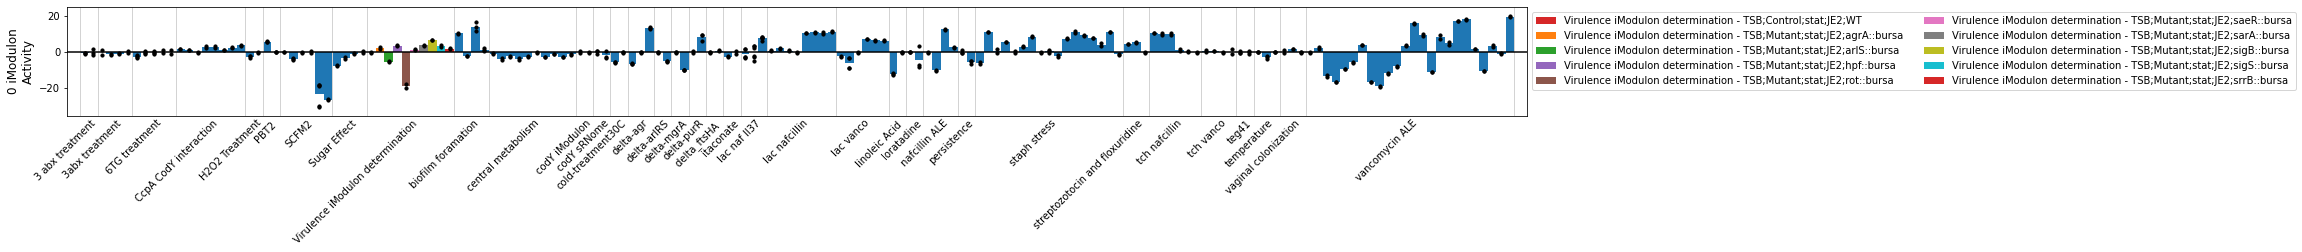

In [1247]:
plot_activities(ica_data, 0, highlight=['Virulence iModulon determination'])

In [1248]:
# Update the ICA data object

ica_data.rename_imodulons({0:'Vir-1'})
ica_data.imodulon_table.loc['Vir-1','category'] = 'functional'

### iModulon 2: LrgAB

In [1249]:
ica_data.view_imodulon(2)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS01360,0.468933,lrgA,NC_010079.1,USA300HOU_0273,308606,309049,+,antiholin-like murein hydrolase modulator LrgA,Function unknown,A0A0E0VLJ4,Op173,NaN
USA300HOU_RS01365,0.399442,lrgB,NC_010079.1,USA300HOU_0274,309042,309743,+,antiholin-like protein LrgB,Cell wall/membrane/envelope biogenesis,A0A0E0VKQ9,Op173,NaN


<AxesSubplot:ylabel='2 iModulon\nActivity'>

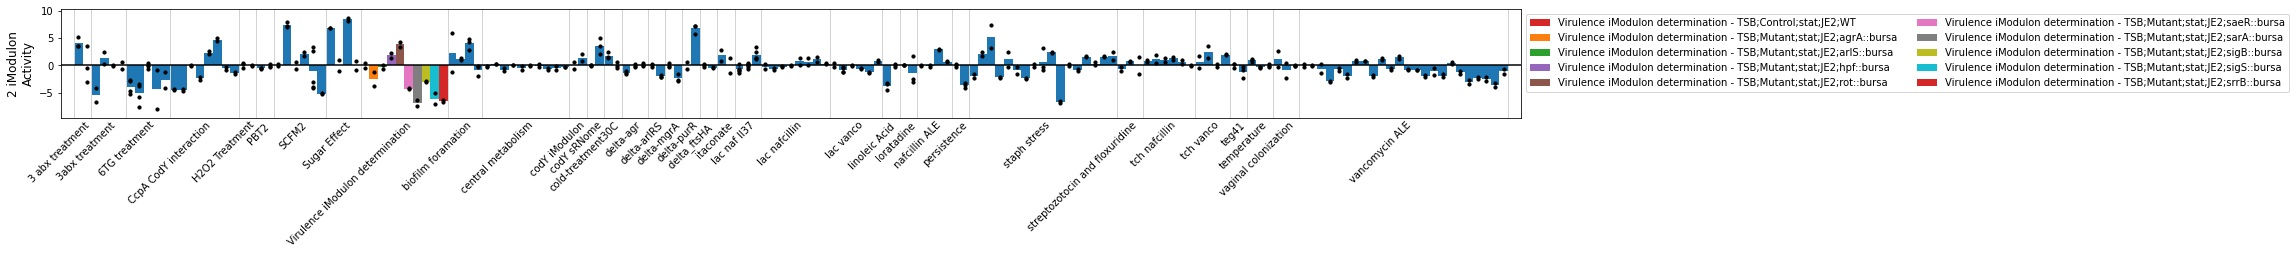

In [1250]:
plot_activities(ica_data, 2, highlight=['Virulence iModulon determination'])

In [1251]:
DF_enrichments[DF_enrichments.imodulon=='2'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1252]:
# Update the ICA data object

ica_data.rename_imodulons({2:'LrgAB'})
ica_data.imodulon_table.loc['LrgAB','category'] = 'functional'

### iModulon 4: BetR


In [1253]:
ica_data.view_imodulon(4)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS14155,0.318150,betA,NC_010079.1,USA300HOU_2605,2749443,2751152,-,choline dehydrogenase,Amino acid transport and metabolism,A0A0E1XL77,Op1722,NaN
USA300HOU_RS14160,0.346979,betB,NC_010079.1,USA300HOU_2606,2751413,2752903,-,betaine-aldehyde dehydrogenase,Energy production and conversion,A0A0H2X0S3,Op1723,NaN
USA300HOU_RS14180,0.188981,USA300HOU_RS14180,NC_010079.1,USA300HOU_2610,2754857,2756479,-,BCCT family transporter,Cell wall/membrane/envelope biogenesis,A0A0E0VUE2,Op1727,ArgR


<AxesSubplot:ylabel='4 iModulon\nActivity'>

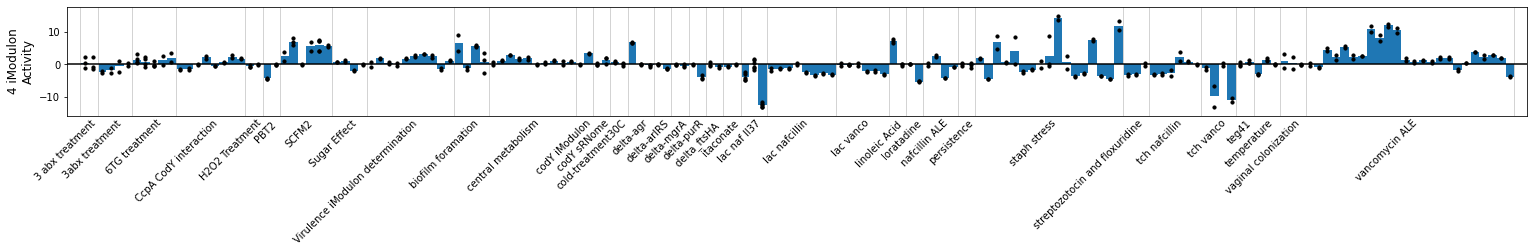

In [1254]:
plot_activities(ica_data, 4)

In [1255]:
DF_enrichments[DF_enrichments.imodulon=='4'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
0,4,M00555,7.348163e-07,0.000187,0.666667,1.0000,0.800000,2.0,2.0,3.0,NaN,KEGG modules,"Betaine biosynthesis, choline => betaine"
3,4,map00260,3.619166e-04,0.072021,0.666667,0.0625,0.114286,2.0,32.0,3.0,"Glycine, serine and threonine metabolism",KEGG pathways,NaN


In [1256]:
# Update the ica_data object
ica_data.rename_imodulons({4:'BetR'})
ica_data.imodulon_table.loc['BetR','category'] = 'regulatory'

### iModulon 7: LTA 

In [1257]:
ica_data.view_imodulon(7).sort_index()

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS03580,0.128800,USA300HOU_RS03580,NC_010079.1,USA300HOU_0683,735519,737408,+,FtsX-like permease family protein,Defense mechanisms,A0A0D3Q5A1,Op449,NaN
USA300HOU_RS04610,0.189584,USA300HOU_RS04610,NC_010079.1,USA300HOU_0891,928034,928144,+,hypothetical protein,No COG annotation,A0A0D1JIZ9,Op587,GraS
USA300HOU_RS04615,0.180102,USA300HOU_RS04615,NC_010079.1,USA300HOU_0892,928192,928344,+,teichoic acid D-Ala incorporation-associated p...,Function unknown,A0A0E0VN94,Op588,NaN
USA300HOU_RS04620,0.142005,dltA,NC_010079.1,USA300HOU_0893,928360,929817,+,D-alanine--poly(phosphoribitol) ligase subunit...,"Secondary metabolites biosynthesis, transport,...",A6QFE3,Op588,NaN
USA300HOU_RS04625,0.135021,dltB,NC_010079.1,USA300HOU_0894,929814,931028,+,PG:teichoic acid D-alanyltransferase DltB,Cell wall/membrane/envelope biogenesis,A0A0E0VNS4,Op588,NaN
USA300HOU_RS04630,0.166067,dltC,NC_010079.1,USA300HOU_0895,931046,931282,+,D-alanine--poly(phosphoribitol) ligase subunit 2,Lipid transport and metabolism,A0A0D1IZ12,Op588,NaN
USA300HOU_RS04635,0.138891,dltD,NC_010079.1,USA300HOU_0896,931279,932454,+,D-alanyl-lipoteichoic acid biosynthesis protei...,Cell wall/membrane/envelope biogenesis,A0A0E8G8K9,Op588,NaN


<AxesSubplot:ylabel='7 iModulon\nActivity'>

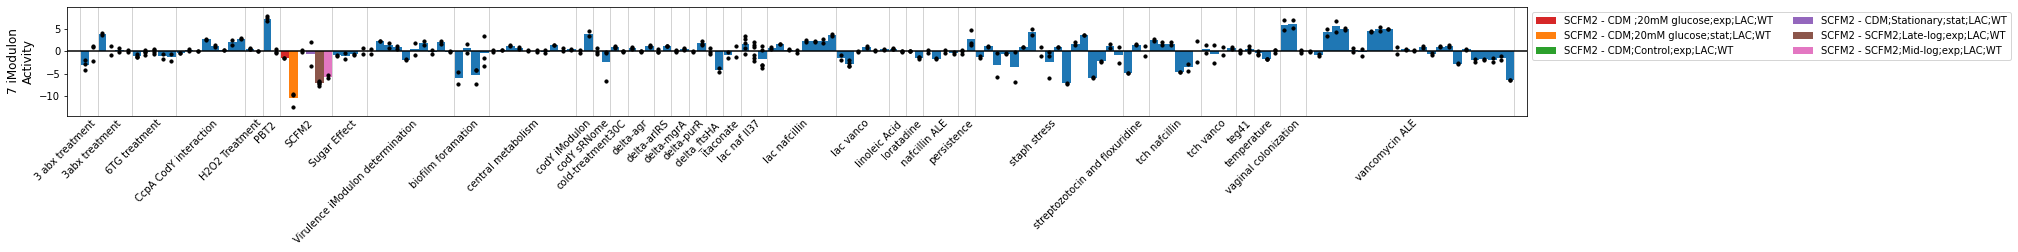

In [1258]:
plot_activities(ica_data,7, highlight='SCFM2')

In [1259]:
DF_enrichments[DF_enrichments.imodulon=='7'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
2,7,M00725,8.801943e-10,2.244495e-07,0.571429,0.500000,0.533333,4.0,8.0,7.0,NaN,KEGG modules,Cationic antimicrobial peptide (CAMP) resistan...
6,7,map01503,1.529521e-10,3.043746e-08,0.714286,0.263158,0.384615,5.0,19.0,7.0,Cationic antimicrobial peptide (CAMP) resistance,KEGG pathways,NaN
9,7,map00473,7.679608e-05,3.820605e-03,0.285714,0.333333,0.307692,2.0,6.0,7.0,NaN,KEGG pathways,NaN
7,7,map05150,3.096280e-09,3.080798e-07,0.714286,0.151515,0.250000,5.0,33.0,7.0,Staphylococcus aureus infection,KEGG pathways,NaN
8,7,map02020,2.861138e-07,1.897888e-05,0.714286,0.063291,0.116279,5.0,79.0,7.0,Two-component system,KEGG pathways,NaN


In [1260]:
# Update the ICA data object

ica_data.rename_imodulons({7:'LTA'})
ica_data.imodulon_table.loc['LTA','category'] = 'regulatory'

### iModulon 8: Uncharacterized

In [1261]:
ica_data.view_imodulon(8)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00175,0.110088,USA300HOU_RS00175,NC_010079.1,NaN,42442,44049,-,IS1182 family transposase,"Replication, recombination and repair",NaN,Op22,NaN
USA300HOU_RS00670,0.161037,USA300HOU_RS00670,NC_010079.1,USA300HOU_0139,147986,148108,+,hypothetical protein,No COG annotation,A0A0E1VP33,Op97,NaN
USA300HOU_RS00995,0.081929,USA300HOU_RS00995,NC_010079.1,USA300HOU_0202,221148,221249,+,hypothetical protein,No COG annotation,A0A0H2WXH0,Op131,NaN
USA300HOU_RS01055,0.083924,USA300HOU_RS01055,NC_010079.1,USA300HOU_0213,236516,237994,+,ABC transporter permease,Amino acid transport and metabolism,A0A0H2XEQ5,Op138,NaN
USA300HOU_RS01060,0.073287,USA300HOU_RS01060,NC_010079.1,USA300HOU_0214,238000,239163,+,ABC transporter permease,Amino acid transport and metabolism,A0A0D3Q3Y6,Op138,NaN
USA300HOU_RS01065,0.104664,USA300HOU_RS01065,NC_010079.1,USA300HOU_0215,239180,240955,+,peptide ABC transporter substrate-binding protein,Amino acid transport and metabolism,A0A0D6GGQ7,Op138,NaN
USA300HOU_RS01070,0.087097,ggt,NC_010079.1,USA300HOU_0216,240993,242999,+,gamma-glutamyltransferase,Amino acid transport and metabolism,A0A0E8H648,Op138,NaN
USA300HOU_RS01910,0.105088,USA300HOU_RS01910,NC_010079.1,USA300HOU_0381,414922,415767,+,ParB/RepB/Spo0J family partition protein,Transcription,A0A0D3Q4U5,Op238,CodY
USA300HOU_RS03000,0.117819,USA300HOU_RS03000,NC_010079.1,USA300HOU_0566,630727,631374,+,HAD family hydrolase,Function unknown,A0A0E7MZM8,Op376,NaN
USA300HOU_RS03010,0.134195,USA300HOU_RS03010,NC_010079.1,USA300HOU_0568,633820,635196,+,long-chain fatty acid--CoA ligase,Lipid transport and metabolism,A0A0H2XIA4,Op378,BirA


In [1262]:
DF_enrichments[DF_enrichments.imodulon=='8'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


<AxesSubplot:ylabel='8 iModulon\nActivity'>

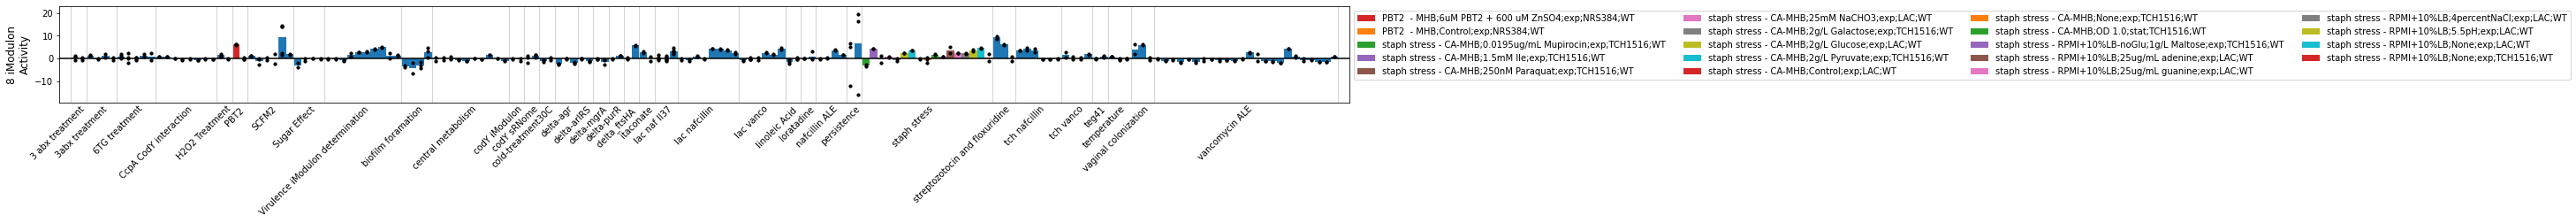

In [1263]:
plot_activities(ica_data,8, highlight=['PBT2 ', 'staph stress'])

In [1264]:
# Update the ica_data object
ica_data.rename_imodulons({8: 'Uncharacterized-9'})

### iModulon 12: PhoR

In [1265]:
ica_data.view_imodulon(12)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00550,0.165962,USA300HOU_RS00550,NC_010079.1,USA300HOU_0116,118945,120606,-,Na/Pi cotransporter family protein,Inorganic ion transport and metabolism,A0A0H2X053,Op82,WalR
USA300HOU_RS07050,0.138793,phoU,NC_010079.1,USA300HOU_1319,1421704,1422345,-,phosphate signaling complex protein PhoU,Inorganic ion transport and metabolism,A0A0E1VRM4,Op884,NaN
USA300HOU_RS07055,0.160048,USA300HOU_RS07055,NC_010079.1,USA300HOU_1320,1422352,1423203,-,phosphate ABC transporter ATP-binding protein,Inorganic ion transport and metabolism,A0A0H3K8K4,Op884,NaN
USA300HOU_RS07060,0.205059,pstA,NC_010079.1,USA300HOU_1321,1423250,1424167,-,phosphate ABC transporter permease PstA,Inorganic ion transport and metabolism,A0A0H2WZS2,Op885,NaN
USA300HOU_RS07065,0.242107,pstC,NC_010079.1,USA300HOU_1322,1424169,1425095,-,phosphate ABC transporter permease subunit PstC,Inorganic ion transport and metabolism,A0A0H2WYU9,Op885,NaN
USA300HOU_RS07070,0.329054,USA300HOU_RS07070,NC_010079.1,USA300HOU_1324,1425286,1426269,-,phosphate ABC transporter substrate-binding pr...,Inorganic ion transport and metabolism,A0A0E1VJS9,Op886,NaN
USA300HOU_RS13740,0.273884,USA300HOU_RS13740,NC_010079.1,NaN,2668742,2668945,+,hypothetical protein,No COG annotation,A0A077UNB7,Op1657,WalR
USA300HOU_RS14280,0.155937,USA300HOU_RS14280,NC_010079.1,USA300HOU_2626,2771202,2772626,+,alkaline phosphatase,Inorganic ion transport and metabolism,A0A0E1VPT4,Op1740,NaN


<AxesSubplot:ylabel='12 iModulon\nActivity'>

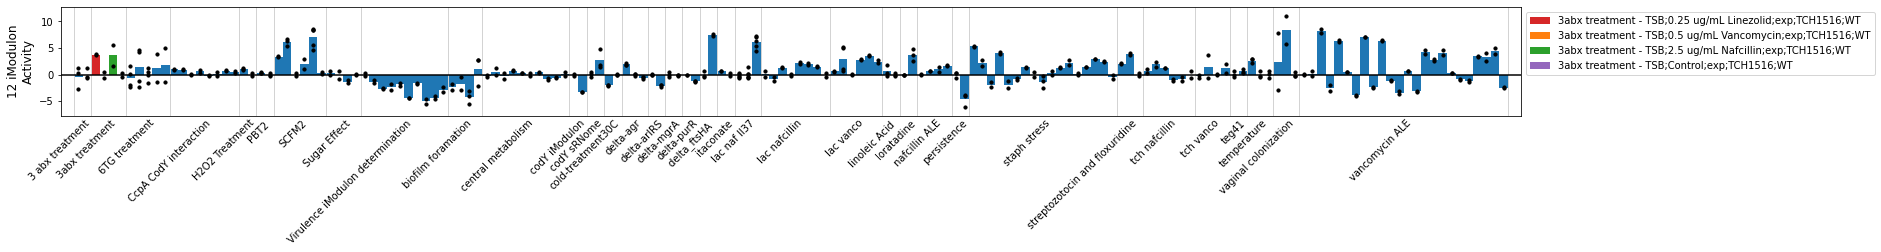

In [1266]:
plot_activities(ica_data,12, highlight= ['3abx treatment'])

In [1267]:
DF_enrichments[DF_enrichments.imodulon=='12'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
9,12,M00222,2.523321e-11,6.434469e-09,0.5,1.000000,0.666667,4.0,4.0,8.0,NaN,KEGG modules,NaN
16,12,map02010,1.291423e-04,2.569932e-02,0.5,0.036364,0.067797,4.0,110.0,8.0,ABC transporters,KEGG pathways,NaN


In [1268]:
# Update the ica_data object
ica_data.rename_imodulons({12:'PhoR'})
ica_data.imodulon_table.loc['PhoR','category'] = 'regulatory'

### iModulon 14: Beta lactam Resistance

In [1269]:
ica_data.view_imodulon(14)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00160,0.269091,mecA,NC_010079.1,USA300HOU_0031,39127,41136,-,PBP2a family beta-lactam-resistant peptidoglyc...,Cell wall/membrane/envelope biogenesis,A0A141HMH7,Op19,MecI
USA300HOU_RS00165,0.151172,USA300HOU_RS00165,NC_010079.1,USA300HOU_0032,41233,42219,+,beta-lactam sensor/signal transducer MecR1,Transcription,A0A0E1VB21,Op20,NaN
USA300HOU_RS00170,0.137891,USA300HOU_RS00170,NC_010079.1,USA300HOU_0033,42191,42451,+,DUF3387 domain-containing protein,Transcription,A0A0E1VD57,Op21,NaN
USA300HOU_RS14765,0.508859,blaZ,NC_010063.1,USA300HOU_pUSA300HOUMR0011,7916,8761,-,penicillin-hydrolyzing class A beta-lactamase ...,Defense mechanisms,D2J789,Op1814,NaN
USA300HOU_RS14770,0.217731,blaR1,NC_010063.1,USA300HOU_pUSA300HOUMR0012,8868,10625,+,beta-lactam sensor/signal transducer BlaR1,Transcription,A0A0H3JNN4,Op1815,NaN
USA300HOU_RS14775,0.226159,blaI,NC_010063.1,USA300HOU_pUSA300HOUMR0013,10615,10995,+,penicillinase repressor BlaI,Transcription,A0A0H3JS94,Op1815,NaN


<AxesSubplot:ylabel='14 iModulon\nActivity'>

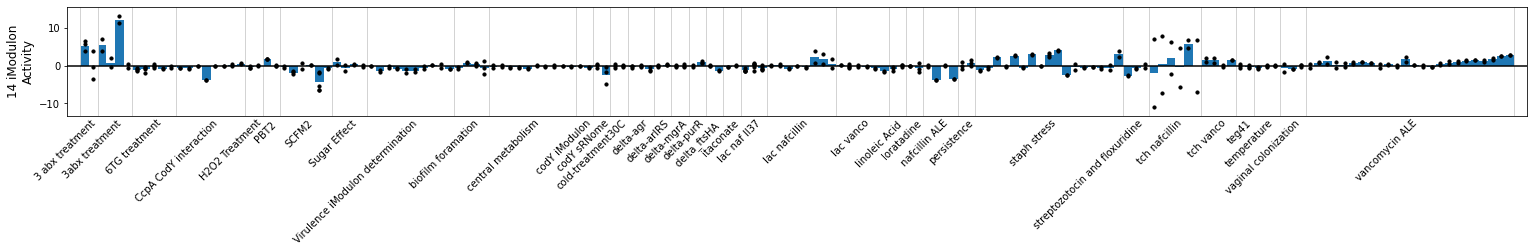

In [1270]:
plot_activities(ica_data,14)

In [1271]:
DF_enrichments[DF_enrichments.imodulon=='14'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
24,14,M00627,5.407116e-12,1.378815e-09,0.666667,1.000000,0.800000,4.0,4.0,6.0,NaN,KEGG modules,"beta-Lactam resistance, Bla system"
25,14,M00625,3.674082e-06,4.684454e-04,0.333333,1.000000,0.500000,2.0,2.0,6.0,NaN,KEGG modules,Methicillin resistance
38,14,map01501,2.336507e-11,4.649650e-09,0.833333,0.294118,0.434783,5.0,17.0,6.0,beta-Lactam resistance,KEGG pathways,NaN


In [1272]:
# Update the ica_data object
ica_data.rename_imodulons({14:'Beta Lactam Resistance'})
ica_data.imodulon_table.loc['Beta Lactam Resistance','category'] = 'functional'

### iModulon 16: TA system

In [1273]:
ica_data.view_imodulon(16)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS13320,0.359141,USA300HOU_RS13320,NC_010079.1,USA300HOU_2446,2587080,2587346,-,Txe/YoeB family addiction module toxin,Function unknown,A0A0H2WZR8,Op1601,NaN
USA300HOU_RS13325,0.364852,USA300HOU_RS13325,NC_010079.1,USA300HOU_2447,2587346,2587603,-,type II toxin-antitoxin system Phd/YefM family...,"Cell cycle control, cell division, chromosome ...",A0A0H2X0J9,Op1601,NaN


<AxesSubplot:ylabel='16 iModulon\nActivity'>

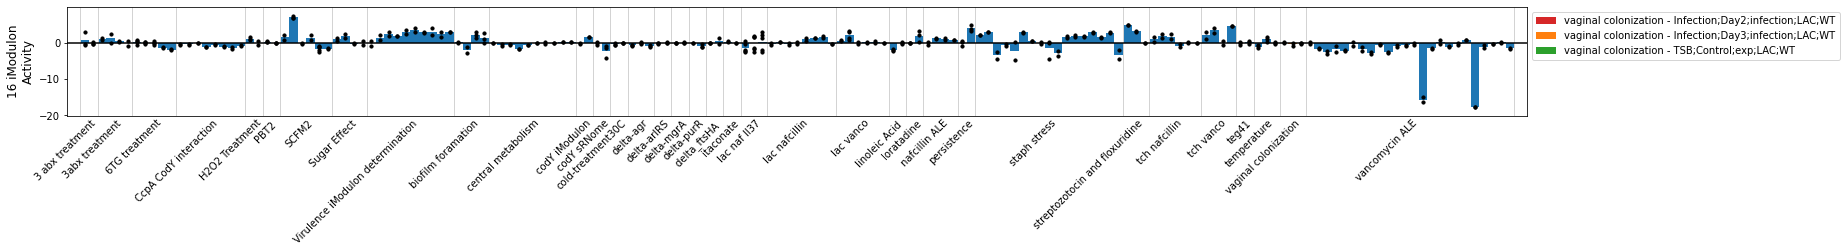

In [1274]:
plot_activities(ica_data,16, highlight='vaginal colonization')

In [1275]:
DF_enrichments[DF_enrichments.imodulon=='16'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1276]:
# Update the ica_data object
ica_data.rename_imodulons({16:'TA system'})
ica_data.imodulon_table.loc['TA system','category'] = 'regulatory'

### iModulon 21: GlpR

In [1277]:
ica_data.view_imodulon(21)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS06540,0.248491,USA300HOU_RS06540,NC_010079.1,USA300HOU_1230,1326251,1327069,+,aquaporin family protein,Carbohydrate transport and metabolism,A0A0E1VJZ3,Op814,CcpA
USA300HOU_RS06545,0.201478,glpK,NC_010079.1,USA300HOU_1231,1327198,1328694,+,glycerol kinase GlpK,Nucleotide transport and metabolism,A6QGJ8,Op815,CcpA
USA300HOU_RS06550,0.422322,USA300HOU_RS06550,NC_010079.1,USA300HOU_1232,1328852,1330525,+,glycerol-3-phosphate dehydrogenase/oxidase,Energy production and conversion,A0A0D6GSN2,Op816,CcpA
USA300HOU_RS11350,0.133085,USA300HOU_RS11350,NC_010079.1,NaN,2220481,2220573,-,hypothetical protein,No COG annotation,A0A2C9TTM1,Op1355,NaN


<AxesSubplot:ylabel='21 iModulon\nActivity'>

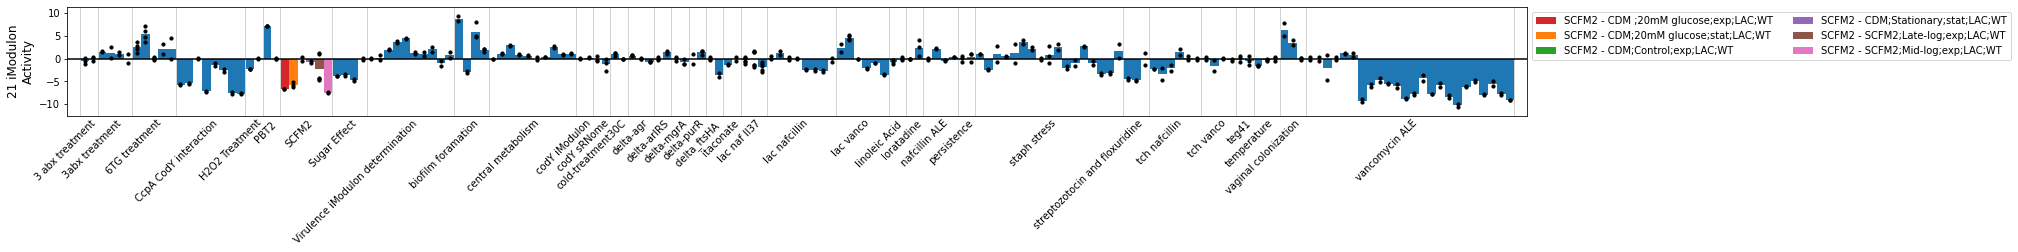

In [1278]:
plot_activities(ica_data,21, highlight=['SCFM2'])

In [1279]:
DF_enrichments[DF_enrichments.imodulon=='21'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1280]:
# Update ICA data object
ica_data.rename_imodulons({21:'GlpR'})
ica_data.imodulon_table.loc['GlpR','category'] = 'regulatory'

### iModulon 25: SCFM2 artefact

In [1281]:
ica_data.view_imodulon(25)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00380,0.107659,USA300HOU_RS00380,NC_010079.1,USA300HOU_0081,83586,84353,+,ABC transporter ATP-binding protein,Amino acid transport and metabolism,A0A0H2XE30,Op55,NaN
USA300HOU_RS01610,0.073989,USA300HOU_RS01610,NC_010079.1,USA300HOU_0322,353190,353564,+,DUF4467 domain-containing protein,Function unknown,A0A0H2WXW6,Op199,NaN
USA300HOU_RS02490,0.096317,USA300HOU_RS02490,NC_010079.1,USA300HOU_0488,524308,524556,+,GIY-YIG nuclease family protein,"Replication, recombination and repair",A0A0E0VN30,Op316,NaN
USA300HOU_RS03100,0.075799,USA300HOU_RS03100,NC_010079.1,USA300HOU_0586,650407,650748,+,DUF1450 domain-containing protein,Function unknown,A0A5A8VIZ8,Op390,NaN
USA300HOU_RS03760,0.084614,USA300HOU_RS03760,NC_010079.1,USA300HOU_0719,769706,770158,+,hypothetical protein,No COG annotation,A0A0D1IUM4,Op476,WalR
USA300HOU_RS03840,0.115731,queD,NC_010079.1,USA300HOU_0734,784667,785086,-,6-carboxytetrahydropterin synthase QueD,Coenzyme transport and metabolism,A0A0E1XHZ0,Op487,PreQ1
USA300HOU_RS04025,0.074033,USA300HOU_RS04025,NC_010079.1,USA300HOU_0771,822352,822846,-,threonine/serine exporter family protein,Function unknown,A0A0E0VM33,Op509,NaN
USA300HOU_RS04040,0.099845,USA300HOU_RS04040,NC_010079.1,USA300HOU_0774,825209,826264,+,undecaprenyl/decaprenyl-phosphate alpha-N-acet...,Cell wall/membrane/envelope biogenesis,A0A0E1X9T1,Op511,NaN
USA300HOU_RS04675,0.074817,USA300HOU_RS04675,NC_010079.1,USA300HOU_0903,939110,940426,+,Na+/H+ antiporter family protein,Function unknown,A0A0H2XHJ2,Op595,HisR
USA300HOU_RS04870,0.080328,USA300HOU_RS04870,NC_010079.1,USA300HOU_0940,984750,984935,-,YjzD family protein,Function unknown,A0A0E0VMH4,Op620,NaN


<AxesSubplot:ylabel='25 iModulon\nActivity'>

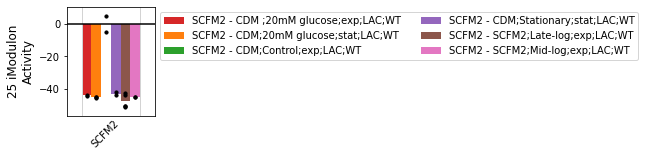

In [1282]:
plot_activities(ica_data,25, projects=['SCFM2'])

In [1283]:
DF_enrichments[DF_enrichments.imodulon=='42'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1284]:
# Update the ica_data object
ica_data.rename_imodulons({25:'scfm2 artefact'})
ica_data.imodulon_table.loc['scfm2 artefact','category'] = 'uncharacterized'

## iModulon 27: Uncharacterized

<AxesSubplot:ylabel='27 iModulon\nActivity'>

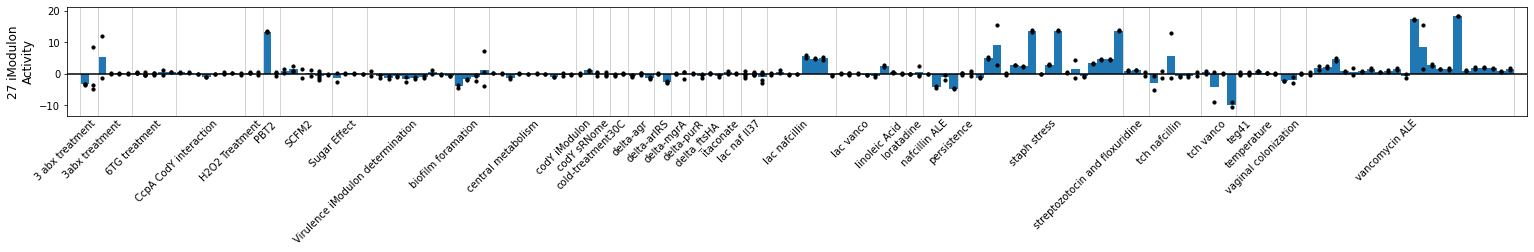

In [1285]:
plot_activities(ica_data,27, highlight=['Vancomycin ALE'])

In [1286]:
DF_enrichments[DF_enrichments.imodulon=='27'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1287]:
# Update the ICA data object

ica_data.rename_imodulons({27:'Uncharacterized-1'})

### iModulon 30: Uncharacterized

In [1288]:
ica_data.view_imodulon(30)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00140,0.036258,USA300HOU_RS00140,NC_010079.1,USA300HOU_0026,35877,36551,-,IS6-like element IS257 family transposase,"Replication, recombination and repair",A0A0H2WXC3,Op15,NaN
USA300HOU_RS00160,-0.129162,mecA,NC_010079.1,USA300HOU_0031,39127,41136,-,PBP2a family beta-lactam-resistant peptidoglyc...,Cell wall/membrane/envelope biogenesis,A0A141HMH7,Op19,MecI
USA300HOU_RS00165,-0.065719,USA300HOU_RS00165,NC_010079.1,USA300HOU_0032,41233,42219,+,beta-lactam sensor/signal transducer MecR1,Transcription,A0A0E1VB21,Op20,NaN
USA300HOU_RS00170,-0.063876,USA300HOU_RS00170,NC_010079.1,USA300HOU_0033,42191,42451,+,DUF3387 domain-containing protein,Transcription,A0A0E1VD57,Op21,NaN
USA300HOU_RS00580,0.043448,spa,NC_010079.1,USA300HOU_0122,128109,129587,-,staphylococcal protein A,Cell wall/membrane/envelope biogenesis,UPI0002C94430,Op88,"CcpA,WalR"
USA300HOU_RS02535,0.036893,purR,NC_010079.1,NaN,531601,532425,+,pur operon repressor,Nucleotide transport and metabolism,A0A0E0VLL8,Op319,NaN
USA300HOU_RS10955,0.037219,USA300HOU_RS10955,NC_010079.1,USA300HOU_2031,2147209,2147343,-,delta-lysin family phenol-soluble modulin,No COG annotation,A0A0H2XH16,Op1315,AgrA
USA300HOU_RS14730,0.179981,USA300HOU_RS14730,NC_010063.1,USA300HOU_pUSA300HOUMR0001,232,1215,+,replication initiator protein A,Function unknown,Q9FDP3,Op1806,NaN
USA300HOU_RS15640,0.067747,USA300HOU_RS15640,NC_010063.1,NaN,1208,1524,+,protein rep,"Replication, recombination and repair",NaN,Op1806,NaN
USA300HOU_RS15935,0.078503,USA300HOU_RS15935,NC_010063.1,USA300HOU_pUSA300HOUMR0003,2071,2220,+,hypothetical protein,No COG annotation,UPI00015FD758,Op1807,NaN


<AxesSubplot:ylabel='30 iModulon\nActivity'>

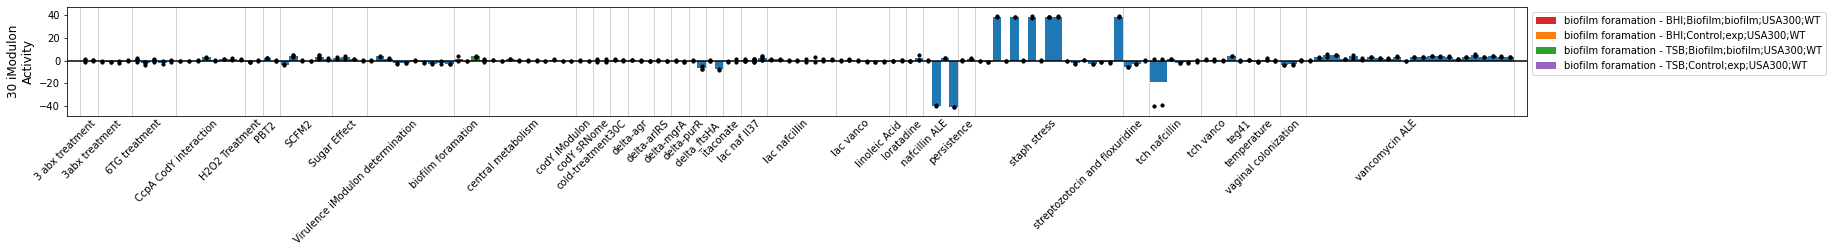

In [1289]:
plot_activities(ica_data,30, highlight=['biofilm foramation'])

In [1290]:
DF_enrichments[DF_enrichments.imodulon=='30'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
51,30,M00627,3.294376e-08,0.000008,0.100,1.000000,0.181818,4.0,4.0,40.0,NaN,KEGG modules,"beta-Lactam resistance, Bla system"
85,30,map01501,2.273102e-06,0.000452,0.125,0.294118,0.175439,5.0,17.0,40.0,beta-Lactam resistance,KEGG pathways,NaN
52,30,M00625,1.910522e-04,0.016239,0.050,1.000000,0.095238,2.0,2.0,40.0,NaN,KEGG modules,Methicillin resistance
53,30,M00747,1.910522e-04,0.016239,0.050,1.000000,0.095238,2.0,2.0,40.0,NaN,KEGG modules,NaN


In [1291]:
# Update the ica_data object
ica_data.rename_imodulons({30:'Uncharacterized-2'})

### iModulon 48: Vir

In [1292]:
ica_data.view_imodulon(33)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00515,0.075724,USA300HOU_RS00515,NC_010079.1,USA300HOU_0109,110142,110912,+,tandem-type lipoprotein,Cell wall/membrane/envelope biogenesis,A0A0H3K5I6,Op76,NaN
USA300HOU_RS00580,0.096053,spa,NC_010079.1,USA300HOU_0122,128109,129587,-,staphylococcal protein A,Cell wall/membrane/envelope biogenesis,UPI0002C94430,Op88,"CcpA,WalR"
USA300HOU_RS00655,0.081407,USA300HOU_RS00655,NC_010079.1,USA300HOU_0136,145771,146178,+,hypothetical protein,No COG annotation,A0A0E1VWM6,Op94,NaN
USA300HOU_RS01450,0.086451,USA300HOU_RS01450,NC_010079.1,USA300HOU_0290,323240,323899,-,ABC transporter ATP-binding protein,Defense mechanisms,A0A0H2X0Y7,Op186,NaN
USA300HOU_RS01455,0.084142,USA300HOU_RS01455,NC_010079.1,USA300HOU_0291,323913,324833,-,ABC transporter permease,Defense mechanisms,A0A0D6GG82,Op186,NaN
USA300HOU_RS01460,0.085157,USA300HOU_RS01460,NC_010079.1,USA300HOU_0292,324830,325996,-,ABC transporter permease,Function unknown,A0A0H2X1B8,Op186,NaN
USA300HOU_RS01465,0.108422,USA300HOU_RS01465,NC_010079.1,USA300HOU_0293,326064,327587,-,hypothetical protein,No COG annotation,A0A0D3Q462,Op187,NaN
USA300HOU_RS01475,0.074072,USA300HOU_RS01475,NC_010079.1,USA300HOU_0295,328545,329132,+,DUF5080 family protein,Function unknown,A0A0H2X0Z4,Op188,NaN
USA300HOU_RS01480,0.142238,USA300HOU_RS01480,NC_010079.1,USA300HOU_0296,329275,330168,-,CHAP domain-containing protein,Function unknown,A0A0H2X0C8,Op189,NaN
USA300HOU_RS01485,0.209191,esxA,NC_010079.1,USA300HOU_0297,330416,330709,+,WXG100 family type VII secretion effector EsxA,Function unknown,A0A0D1K0V0,Op190,NaN


<AxesSubplot:ylabel='33 iModulon\nActivity'>

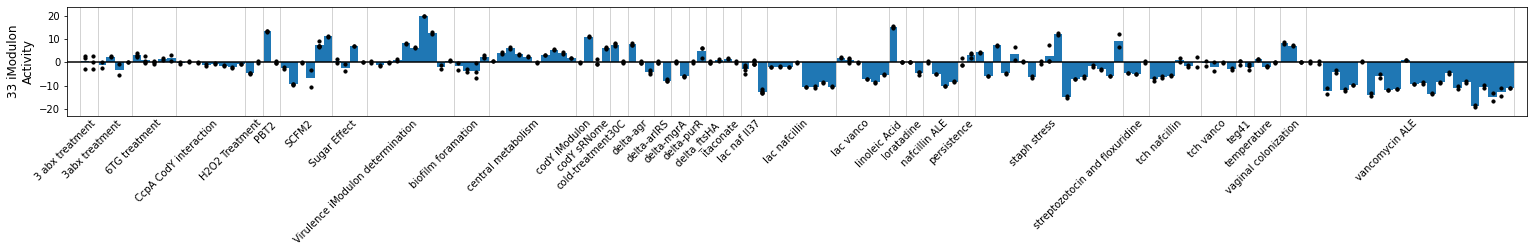

In [1293]:
plot_activities(ica_data,33)

In [1294]:
DF_enrichments[DF_enrichments.imodulon=='33'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1295]:
# Update ICA data object
ica_data.rename_imodulons({33:'Vir-2'})
ica_data.imodulon_table.loc['Vir-2','category'] = 'functional'

### iModulon 34: Uncharacterized

In [1296]:
ica_data.view_imodulon(34)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS14940,0.093592,USA300HOU_RS14940,NC_010079.1,USA300HOU_0073,76019,76171,-,hypothetical protein,Inorganic ion transport and metabolism,A0A3A0RYE3,Op51,NaN
USA300HOU_RS04245,-0.067093,USA300HOU_RS04245,NC_010079.1,USA300HOU_0814,869978,870124,-,hypothetical protein,No COG annotation,A0A0E1VJD0,Op536,NaN
USA300HOU_RS04345,0.075042,USA300HOU_RS04345,NC_010079.1,USA300HOU_0833,886216,886710,-,GNAT family N-acetyltransferase,"Translation, ribosomal structure and biogenesis",A0A0E1VJA8,Op554,NaN
USA300HOU_RS04505,0.078116,USA300HOU_RS04505,NC_010079.1,USA300HOU_0868,910111,910305,+,CsbD family protein,Function unknown,A0A0E0VN75,Op572,"SigB,Genomic Island 3"
USA300HOU_RS04595,0.066192,USA300HOU_RS04595,NC_010079.1,USA300HOU_0888,925575,926009,+,DUF86 domain-containing protein,Function unknown,A0A0E7MS50,Op586,NaN
USA300HOU_RS05165,0.070086,USA300HOU_RS05165,NC_010079.1,USA300HOU_0986,1044697,1044828,-,hypothetical protein,No COG annotation,A0A0H2WWF1,Op656,WalR
USA300HOU_RS05250,0.071727,USA300HOU_RS05250,NC_010079.1,USA300HOU_0999,1062753,1063223,-,DUF2538 family protein,Function unknown,A0A0H2WWG0,Op669,NaN
USA300HOU_RS05375,0.106259,USA300HOU_RS05375,NC_010079.1,NaN,1088266,1088400,-,hypothetical protein,No COG annotation,A0A0E0VN11,Op679,WalR
USA300HOU_RS05405,0.064953,USA300HOU_RS05405,NC_010079.1,USA300HOU_1027,1094418,1094651,-,glutaredoxin family protein,"PostXtranslational modification, protein turno...",A0A0H2WYJ6,Op684,NaN
USA300HOU_RS05835,0.090439,USA300HOU_RS05835,NC_010079.1,USA300HOU_1101,1172049,1172273,+,hypothetical protein,No COG annotation,A0A2Y9TPG0,Op739,NaN


<AxesSubplot:ylabel='34 iModulon\nActivity'>

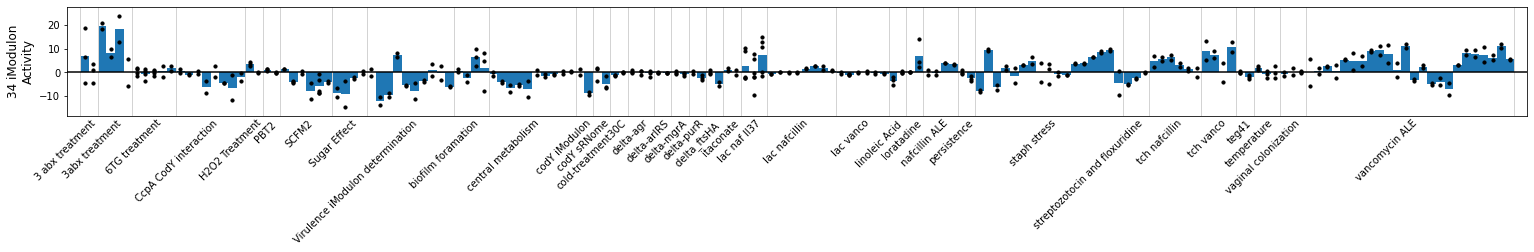

In [1297]:
plot_activities(ica_data,34)

In [1298]:
DF_enrichments[DF_enrichments.imodulon=='34'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1299]:
# Update ICA data object
ica_data.rename_imodulons({34:'Uncharacterized-3'})

### iModulon 44: Translation

In [1300]:
ica_data.view_imodulon(44)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS02835,0.090723,USA300HOU_RS02835,NC_010079.1,USA300HOU_0533,584188,584688,+,50S ribosomal protein L10,"Translation, ribosomal structure and biogenesis",A0A0E1VJZ8,Op348,L10_leader
USA300HOU_RS02840,0.084530,rplL,NC_010079.1,USA300HOU_0534,584731,585099,+,50S ribosomal protein L7/L12,"Translation, ribosomal structure and biogenesis",A0A077W1M4,Op349,L10_leader
USA300HOU_RS02845,0.065350,USA300HOU_RS02845,NC_010079.1,USA300HOU_0535,585274,585882,+,class I SAM-dependent methyltransferase,"Translation, ribosomal structure and biogenesis",A0A0E1X880,Op350,NaN
USA300HOU_RS02860,0.095208,USA300HOU_RS02860,NC_010079.1,USA300HOU_0538,593545,593799,+,50S ribosomal protein L7ae-like protein,"Translation, ribosomal structure and biogenesis",A0A0D1HDA6,Op353,NaN
USA300HOU_RS02865,0.094800,rpsL,NC_010079.1,USA300HOU_0539,593897,594310,+,30S ribosomal protein S12,"Translation, ribosomal structure and biogenesis",A0A0D1J193,Op354,NaN
USA300HOU_RS02870,0.094681,rpsG,NC_010079.1,USA300HOU_0540,594376,594846,+,30S ribosomal protein S7,"Translation, ribosomal structure and biogenesis",A0A077VHU6,Op355,NaN
USA300HOU_RS02875,0.101668,fusA,NC_010079.1,NaN,594969,597050,+,elongation factor G,"Translation, ribosomal structure and biogenesis",A0A0D1FPD0,Op356,NaN
USA300HOU_RS12040,0.105873,rplQ,NC_010079.1,USA300HOU_2214,2357588,2357956,-,50S ribosomal protein L17,"Translation, ribosomal structure and biogenesis",A0A077UG91,Op1436,NaN
USA300HOU_RS12045,0.110207,USA300HOU_RS12045,NC_010079.1,USA300HOU_2215,2357973,2358917,-,DNA-directed RNA polymerase subunit alpha,Transcription,A0A0D1GTM7,Op1436,NaN
USA300HOU_RS12050,0.113182,rpsK,NC_010079.1,USA300HOU_2216,2358992,2359381,-,30S ribosomal protein S11,"Translation, ribosomal structure and biogenesis",A0A077UKD6,Op1437,NaN


<AxesSubplot:ylabel='44 iModulon\nActivity'>

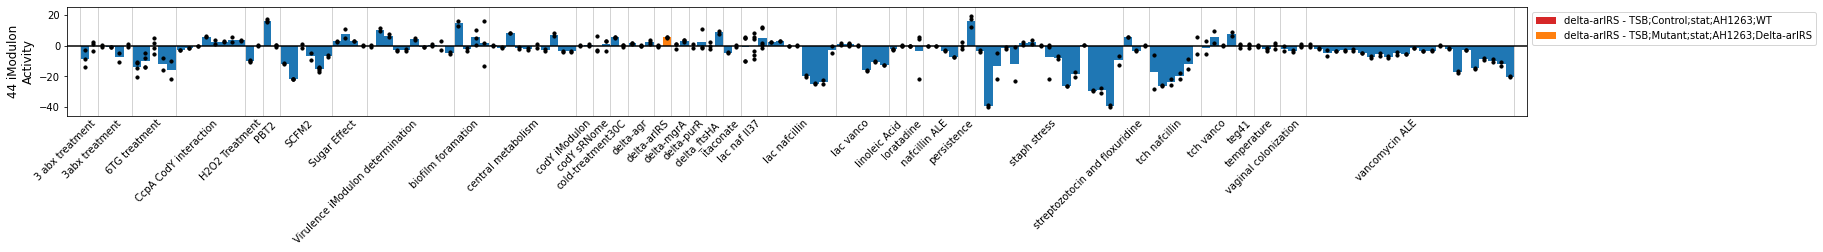

In [1301]:
plot_activities(ica_data,44, highlight=['delta-arlRS'])

In [1302]:
DF_enrichments[DF_enrichments.imodulon=='44'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
71,44,M00179,9.875014e-44,1.259064e-41,0.666667,0.750000,0.705882,24.0,32.0,36.0,NaN,KEGG modules,NaN
106,44,map03010,3.435010e-49,6.835669e-47,0.833333,0.517241,0.638298,30.0,58.0,36.0,Ribosome,KEGG pathways,NaN
70,44,M00178,3.435010e-49,8.759274e-47,0.833333,0.517241,0.638298,30.0,58.0,36.0,NaN,KEGG modules,NaN


In [1303]:
# Update ICA data object
ica_data.rename_imodulons({44:'Translation'})
ica_data.imodulon_table.loc['Translation','category'] = 'functional'

### iModulon 45: Uncharacterized

In [1304]:
ica_data.view_imodulon(45)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00185,0.090475,USA300HOU_RS00185,NC_010079.1,USA300HOU_0036,44622,44933,-,DUF960 domain-containing protein,"Replication, recombination and repair",A0A060PLE8,Op22,NaN
USA300HOU_RS00190,0.078657,USA300HOU_RS00190,NC_010079.1,USA300HOU_0038,45020,45370,-,hypothetical protein,Function unknown,A0A060PNX9,Op23,NaN
USA300HOU_RS00260,0.103085,USA300HOU_RS00260,NC_010079.1,USA300HOU_0053,60794,61153,-,hypothetical protein,No COG annotation,A0A169SZC0,Op37,Genomic Island 1
USA300HOU_RS15690,0.101980,USA300HOU_RS15690,NC_010079.1,NaN,168545,169453,+,replication initiation factor domain-containin...,No COG annotation,NaN,Op109,NaN
USA300HOU_RS00785,0.079016,USA300HOU_RS00785,NC_010079.1,USA300HOU_0160,169609,169863,+,hypothetical protein,No COG annotation,A0A5A8VR73,Op110,NaN
USA300HOU_RS01225,0.095248,USA300HOU_RS01225,NC_010079.1,USA300HOU_0247,280392,280748,-,DUF488 domain-containing protein,Function unknown,A0A0D1HYP3,Op158,NaN
USA300HOU_RS01930,0.147869,USA300HOU_RS01930,NC_010079.1,USA300HOU_0385,418233,418424,-,hypothetical protein,No COG annotation,A0A0D1FAW8,Op240,NaN
USA300HOU_RS02265,0.099551,USA300HOU_RS02265,NC_010079.1,USA300HOU_0452,474687,475889,+,GTP-binding protein,Function unknown,A0A0E7SEU0,Op288,Zur
USA300HOU_RS03740,0.141563,USA300HOU_RS03740,NC_010079.1,USA300HOU_0715,766532,766816,-,hypothetical protein,No COG annotation,A0A0E1VM14,Op473,NaN
USA300HOU_RS03745,0.132691,USA300HOU_RS03745,NC_010079.1,USA300HOU_0716,766813,767430,-,DUF1361 domain-containing protein,Function unknown,A0A0E1VU54,Op473,NaN


<AxesSubplot:xlabel='Gene Start', ylabel='45 Gene Weight'>

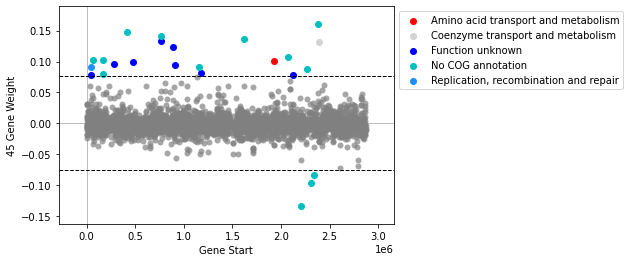

In [1305]:
plot_gene_weights(ica_data, 45)

<AxesSubplot:ylabel='45 iModulon\nActivity'>

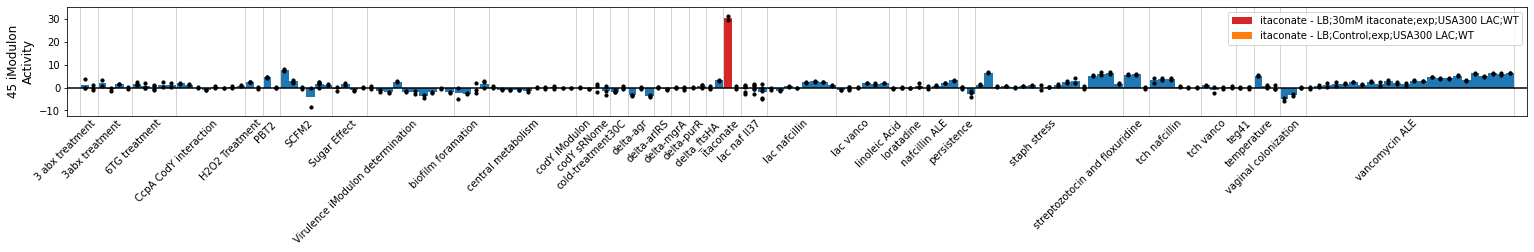

In [1306]:
plot_activities(ica_data,45, highlight='itaconate')

In [1307]:
DF_enrichments[DF_enrichments.imodulon=='45'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1308]:
# Update ICA data object
ica_data.rename_imodulons({45:'Itaconate Response'})
ica_data.imodulon_table.loc['Itaconate Response', 'category'] = 'functional'

### iModulon 47: Uncharacterized

In [1309]:
ica_data.view_imodulon(47)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00580,-0.117328,spa,NC_010079.1,USA300HOU_0122,128109,129587,-,staphylococcal protein A,Cell wall/membrane/envelope biogenesis,UPI0002C94430,Op88,"CcpA,WalR"
USA300HOU_RS02010,0.088131,USA300HOU_RS02010,NC_010079.1,USA300HOU_0402,427395,427688,-,hypothetical protein,No COG annotation,A0A0H2X0H3,Op254,NaN
USA300HOU_RS02015,0.160641,ahpF,NC_010079.1,USA300HOU_0403,427767,429290,-,alkyl hydroperoxide reductase subunit F,"PostXtranslational modification, protein turno...",A0A0D6GAS3,Op255,PerR
USA300HOU_RS02020,0.155400,ahpC,NC_010079.1,USA300HOU_0404,429306,429875,-,peroxiredoxin,"PostXtranslational modification, protein turno...",A0A0D1IJ21,Op255,PerR
USA300HOU_RS03360,0.159636,USA300HOU_RS03360,NC_010079.1,USA300HOU_0639,694255,694656,-,DMT family transporter,Function unknown,A0A5A8VJ48,Op423,NaN
USA300HOU_RS03370,0.085659,USA300HOU_RS03370,NC_010079.1,USA300HOU_0641,695092,695295,-,DUF1659 domain-containing protein,No COG annotation,A0A0H2WVC4,Op424,NaN
USA300HOU_RS03375,0.271814,USA300HOU_RS03375,NC_010079.1,USA300HOU_0642,695454,696014,+,tyrosine-type recombinase/integrase,"Replication, recombination and repair",A0A0E1VJN8,Op425,"SigB,WalR"
USA300HOU_RS03380,0.246066,USA300HOU_RS03380,NC_010079.1,USA300HOU_0643,696033,698435,+,DUF4040 family protein,Inorganic ion transport and metabolism,A0A0D6G5V9,Op425,NaN
USA300HOU_RS03385,0.239542,USA300HOU_RS03385,NC_010079.1,USA300HOU_0644,698422,698847,+,monovalent cation/H+ antiporter subunit B,Inorganic ion transport and metabolism,A0A0E1VTY1,Op425,NaN
USA300HOU_RS03390,0.216907,USA300HOU_RS03390,NC_010079.1,USA300HOU_0645,698844,699188,+,cation:proton antiporter,Inorganic ion transport and metabolism,A0A0E1VJR6,Op425,NaN


<AxesSubplot:ylabel='47 iModulon\nActivity'>

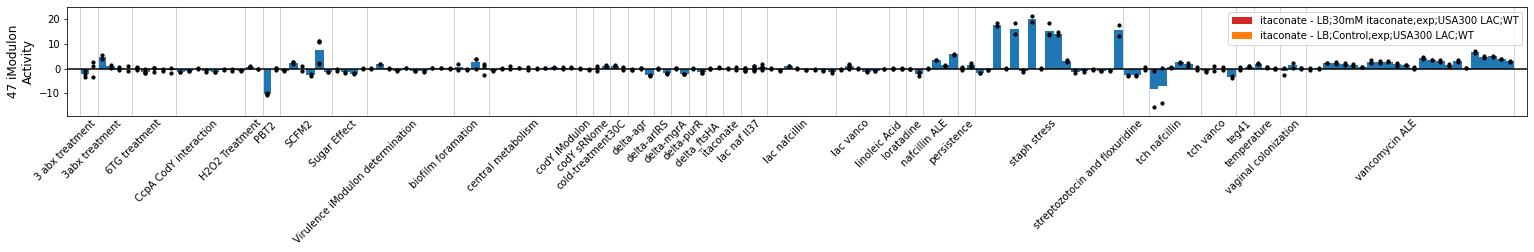

In [1310]:
plot_activities(ica_data, 47, highlight='itaconate')

In [1311]:
DF_enrichments[DF_enrichments.imodulon=='47'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1312]:
# Update ICA data object
ica_data.rename_imodulons({47:'Uncharacterized-4'})

### iModulon 51: Uncharacterized
Contains additional spa and sasA gene

<AxesSubplot:ylabel='51 iModulon\nActivity'>

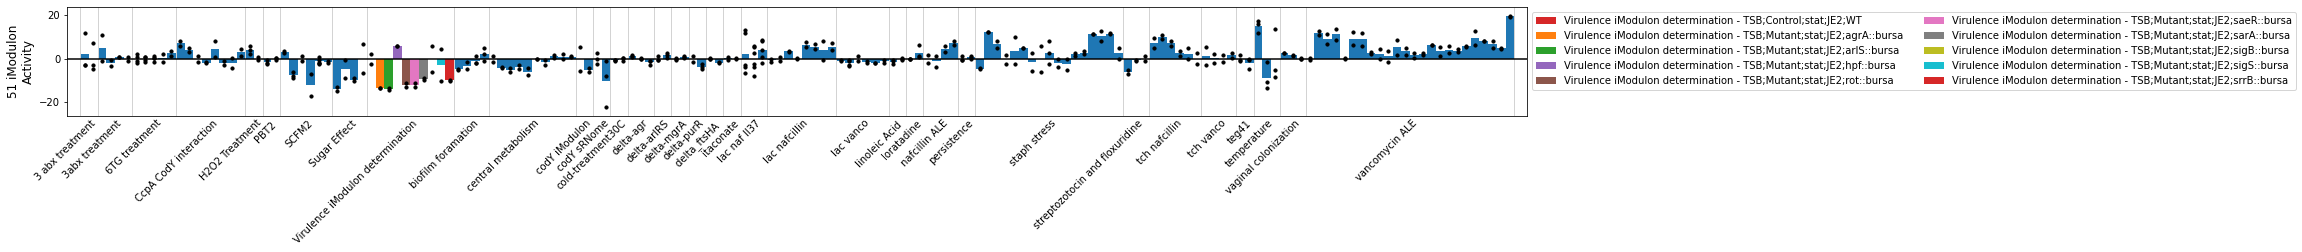

In [1313]:
plot_activities(ica_data,51, highlight=['Virulence iModulon determination'])

In [1314]:
DF_enrichments[DF_enrichments.imodulon=='51'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


<AxesSubplot:xlabel='Gene Start', ylabel='51 Gene Weight'>

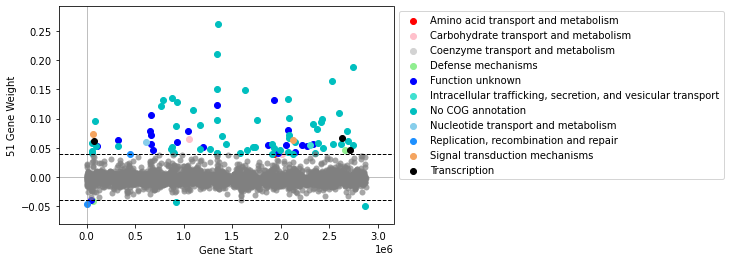

In [1315]:
plot_gene_weights(ica_data, 51)

In [1316]:
# Update ICA data object
ica_data.rename_imodulons({51:'Uncharacterized-5'})

### iModulon 53: PurR Accessory

In [1317]:
ica_data.view_imodulon(53)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS02535,-0.310205,purR,NC_010079.1,NaN,531601,532425,+,pur operon repressor,Nucleotide transport and metabolism,A0A0E0VLL8,Op319,NaN
USA300HOU_RS02540,-0.274821,USA300HOU_RS02540,NC_010079.1,NaN,532442,532822,+,RidA family protein,"Translation, ribosomal structure and biogenesis",A0A0D6FX43,Op319,NaN
USA300HOU_RS02545,-0.194488,spoVG,NC_010079.1,NaN,532894,533196,+,septation regulator SpoVG,"Cell cycle control, cell division, chromosome ...",A0A0E0VM46,Op320,NaN
USA300HOU_RS13555,0.103843,fnbA,NC_010079.1,USA300HOU_2491,2632891,2635947,-,fibronectin-binding protein FnbA,Cell wall/membrane/envelope biogenesis,A0A0E7R7D1,Op1632,WalR
USA300HOU_RS14800,0.336720,aph(3')-IIIa,NC_010063.1,USA300HOU_pUSA300HOUMR0018,14197,14991,-,aminoglycoside O-phosphotransferase APH(3')-IIIa,"Translation, ribosomal structure and biogenesis",A0A059N2T2,Op1821,NaN
USA300HOU_RS14805,0.297458,sat4,NC_010063.1,USA300HOU_pUSA300HOUMR0019,15084,15614,-,streptothricin N-acetyltransferase Sat4,Transcription,A0A132P3P0,Op1822,NaN


<AxesSubplot:ylabel='53 iModulon\nActivity'>

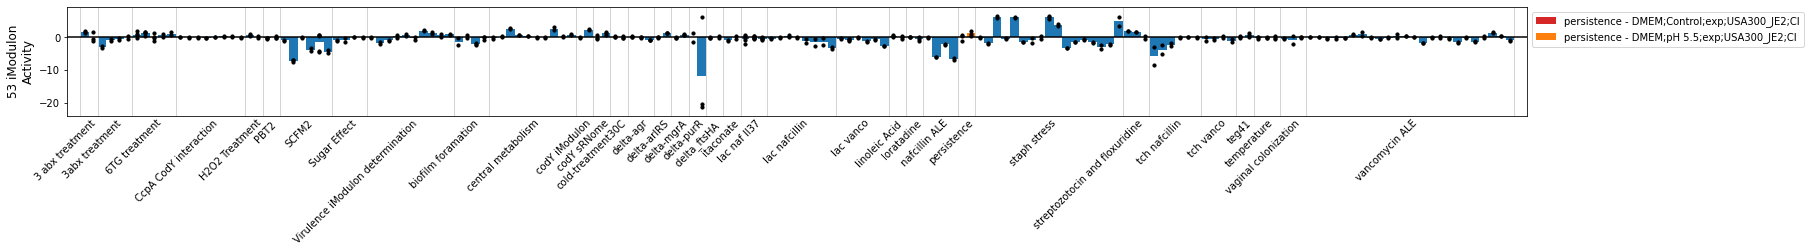

In [1318]:
plot_activities(ica_data,53, highlight=['persistence'])

In [1319]:
DF_enrichments[DF_enrichments.imodulon=='53'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1320]:
# Update ICA data object
ica_data.rename_imodulons({53:'PurR Accessory'})
ica_data.imodulon_table.loc['PurR Accessory','category'] = 'regulatory'

### iModulon 56: Pheno Soluble Modulin

In [1321]:
ica_data.view_imodulon(56)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS15710,0.332266,USA300HOU_RS15710,NC_010079.1,NaN,476548,476610,-,phenol-soluble modulin PSM-alpha-4,No COG annotation,UPI000161A44A,Op289,NaN
USA300HOU_RS15050,0.397985,USA300HOU_RS15050,NC_010079.1,NaN,476674,476742,-,phenol-soluble modulin PSM-alpha-3,No COG annotation,A0A2K4AJ15,Op290,NaN
USA300HOU_RS15715,0.408422,USA300HOU_RS15715,NC_010079.1,USA300HOU_0455,476794,476859,-,phenol-soluble modulin PSM-alpha-2,No COG annotation,UPI00015FD703,Op291,NaN
USA300HOU_RS15720,0.391188,USA300HOU_RS15720,NC_010079.1,USA300HOU_0456,476891,476956,-,phenol-soluble modulin PSM-alpha-1,No COG annotation,UPI00015FD704,Op292,NaN
USA300HOU_RS05895,0.163135,USA300HOU_RS05895,NC_010079.1,USA300HOU_1112,1182345,1182479,+,beta-class phenol-soluble modulin,Function unknown,A0A0E1VKC6,Op748,NaN
USA300HOU_RS05900,0.175458,USA300HOU_RS05900,NC_010079.1,USA300HOU_1113,1182536,1182670,+,beta-class phenol-soluble modulin,Function unknown,A0A0E0VPU2,Op749,NaN
USA300HOU_RS10955,0.135577,USA300HOU_RS10955,NC_010079.1,USA300HOU_2031,2147209,2147343,-,delta-lysin family phenol-soluble modulin,No COG annotation,A0A0H2XH16,Op1315,AgrA


<AxesSubplot:ylabel='56 iModulon\nActivity'>

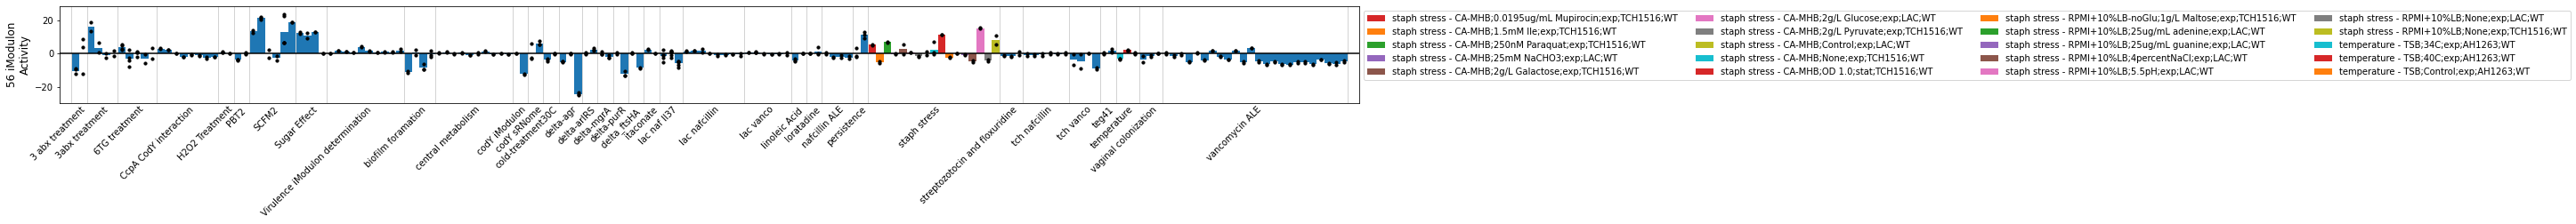

In [1322]:
plot_activities(ica_data,56, highlight=['temperature', 'staph stress'])

In [1323]:
DF_enrichments[DF_enrichments.imodulon=='56'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1324]:
# Update ICA data object
ica_data.rename_imodulons({56:'PSM'})
ica_data.imodulon_table.loc['PSM','category'] = 'functional'

### iModulon 57: MgrA

In [1325]:
ica_data.view_imodulon(57)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00580,-0.116261,spa,NC_010079.1,USA300HOU_0122,128109,129587,-,staphylococcal protein A,Cell wall/membrane/envelope biogenesis,UPI0002C94430,Op88,"CcpA,WalR"
USA300HOU_RS00675,-0.207096,USA300HOU_RS00675,NC_010079.1,USA300HOU_0140,148178,149158,+,NAD-dependent epimerase/dehydratase family pro...,Cell wall/membrane/envelope biogenesis,A0A0E1VM06,Op98,NaN
USA300HOU_RS00680,-0.203940,USA300HOU_RS00680,NC_010079.1,USA300HOU_0141,149121,149813,+,sugar transferase,Cell wall/membrane/envelope biogenesis,A0A068A5A1,Op98,NaN
USA300HOU_RS00685,-0.183570,USA300HOU_RS00685,NC_010079.1,USA300HOU_0142,150023,151189,+,glycosyltransferase family 4 protein,Cell wall/membrane/envelope biogenesis,A0A0H2XHZ0,Op99,NaN
USA300HOU_RS00690,-0.161972,USA300HOU_RS00690,NC_010079.1,USA300HOU_0143,151170,152408,+,O-antigen ligase family protein,Cell wall/membrane/envelope biogenesis,A0A0D3Q3M4,Op99,NaN
USA300HOU_RS00695,-0.104484,USA300HOU_RS00695,NC_010079.1,USA300HOU_0144,152398,153828,+,lipopolysaccharide biosynthesis protein,Function unknown,A0A0H2X0Q6,Op99,NaN
USA300HOU_RS00740,-0.067883,phnE,NC_010079.1,USA300HOU_0152,161117,161932,-,phosphonate ABC transporter%2C permease protei...,Inorganic ion transport and metabolism,A0A0E0VM78,Op104,NaN
USA300HOU_RS00745,-0.073759,phnE,NC_010079.1,USA300HOU_0153,161929,162729,-,phosphonate ABC transporter%2C permease protei...,Inorganic ion transport and metabolism,A0A0E1VNY1,Op104,NaN
USA300HOU_RS00750,-0.072571,phnC,NC_010079.1,USA300HOU_0154,162731,163504,-,phosphonate ABC transporter ATP-binding protein,Inorganic ion transport and metabolism,A0A0H3K647,Op104,NaN
USA300HOU_RS00755,-0.074553,USA300HOU_RS00755,NC_010079.1,USA300HOU_0155,163718,164674,-,phosphate/phosphite/phosphonate ABC transporte...,Inorganic ion transport and metabolism,A0A0E0VLY0,Op105,NaN


<AxesSubplot:ylabel='57 iModulon\nActivity'>

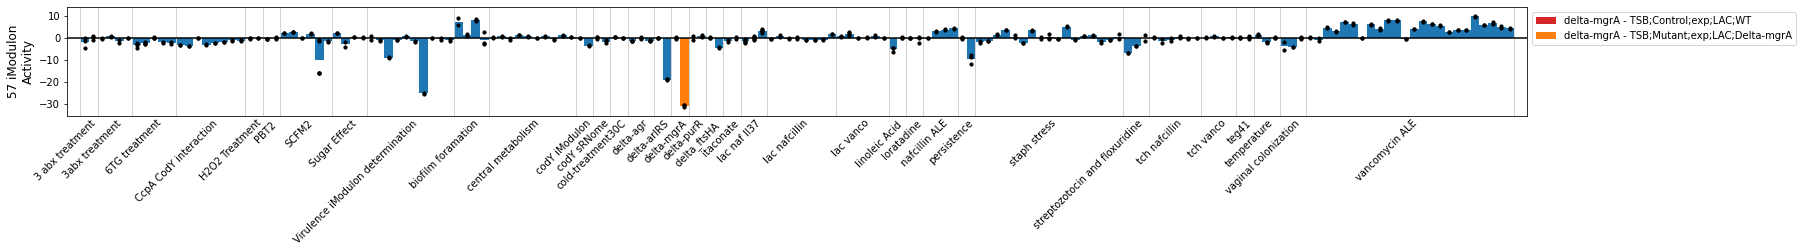

In [1326]:
plot_activities(ica_data,57, highlight='delta-mgrA')

In [1327]:
DF_enrichments[DF_enrichments.imodulon=='57'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
89,57,M00223,1.323987e-07,0.000034,0.071429,1.0,0.133333,4.0,4.0,56.0,NaN,KEGG modules,NaN
116,57,map00791,7.132041e-06,0.001419,0.053571,1.0,0.101695,3.0,3.0,56.0,Atrazine degradation,KEGG pathways,NaN


In [1328]:
# Update ICA data object
ica_data.rename_imodulons({57:'MgrA'})
ica_data.imodulon_table.loc['MgrA','category'] = 'regulatory'

### iModulon 60: ArlRS

In [1329]:
ica_data.view_imodulon(60)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00555,-0.089608,USA300HOU_RS00555,NC_010079.1,USA300HOU_0117,120932,122707,-,oleate hydratase,Function unknown,A0A0D6GJV1,Op83,NaN
USA300HOU_RS03710,-0.259768,USA300HOU_RS03710,NC_010079.1,USA300HOU_0709,760153,760596,-,MarR family transcriptional regulator,Transcription,A0A0D1IUP6,Op468,SigB
USA300HOU_RS03715,-0.104655,USA300HOU_RS03715,NC_010079.1,USA300HOU_0710,760823,761749,+,GTP-binding protein,Function unknown,A0A0D6G236,Op469,NaN
USA300HOU_RS05215,-0.093014,sspA,NC_010079.1,USA300HOU_0996,1053489,1054499,-,Glu-specific serine endopeptidase SspA,Cell wall/membrane/envelope biogenesis,A0A0D6HU18,Op663,NaN
USA300HOU_RS06275,0.100722,USA300HOU_RS06275,NC_010079.1,USA300HOU_1178,1263102,1264220,+,LysM peptidoglycan-binding domain-containing p...,Cell wall/membrane/envelope biogenesis,A0A0D6HQY2,Op785,NaN
USA300HOU_RS06280,0.103884,fmhC,NC_010079.1,USA300HOU_1179,1264248,1265492,+,FemA/FemB family glycyltransferase FmhC,Defense mechanisms,A0A0H2WZP2,Op785,NaN
USA300HOU_RS06285,0.091321,dprA,NC_010079.1,USA300HOU_1180,1265665,1266537,+,DNA-protecting protein DprA,"Replication, recombination and repair",A0A0H2WYS2,Op786,WalR
USA300HOU_RS07215,0.334655,arlS,NC_010079.1,USA300HOU_1349,1454205,1455560,-,sensor histidine kinase ArlS,Signal transduction mechanisms,A0A0E1VJK4,Op901,Fur
USA300HOU_RS07220,0.347725,arlR,NC_010079.1,USA300HOU_1350,1455557,1456216,-,response regulator transcription factor ArlR,Transcription,A0A0E0VPR1,Op901,NaN
USA300HOU_RS10815,-0.093354,USA300HOU_RS10815,NC_010079.1,USA300HOU_2001,2122928,2123257,+,hypothetical protein,No COG annotation,A0A0E7XXR7,Op1293,"VraR,Genomic Island 9"


<AxesSubplot:ylabel='60 iModulon\nActivity'>

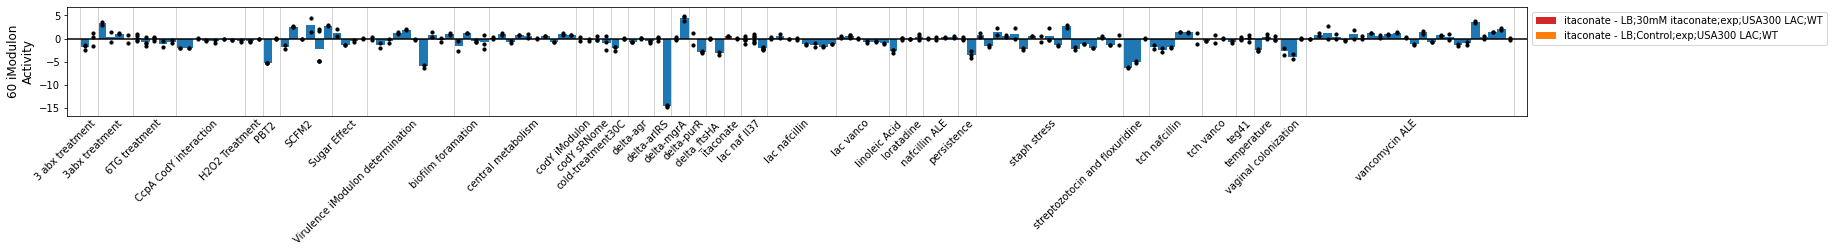

In [1330]:
plot_activities(ica_data,60, highlight=['itaconate'])

In [1331]:
DF_enrichments[DF_enrichments.imodulon=='73'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1332]:
# Update ICA data object
ica_data.rename_imodulons({60:'ArlRS'})
ica_data.imodulon_table.loc['ArlRS','category'] = 'regulatory'

### iModulon 64: Uncharacterized

In [1333]:
ica_data.view_imodulon(64)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00900,0.078295,USA300HOU_RS00900,NC_010079.1,USA300HOU_0183,194986,195189,-,hypothetical protein,No COG annotation,A0A0E1VNQ4,Op119,WalR
USA300HOU_RS15715,0.078315,USA300HOU_RS15715,NC_010079.1,USA300HOU_0455,476794,476859,-,phenol-soluble modulin PSM-alpha-2,No COG annotation,UPI00015FD703,Op291,NaN
USA300HOU_RS02525,0.085573,USA300HOU_RS02525,NC_010079.1,USA300HOU_0494,530166,530429,+,hypothetical protein,Function unknown,A0A077UKT2,Op318,NaN
USA300HOU_RS04870,0.111784,USA300HOU_RS04870,NC_010079.1,USA300HOU_0940,984750,984935,-,YjzD family protein,Function unknown,A0A0E0VMH4,Op620,NaN
USA300HOU_RS05115,0.117875,USA300HOU_RS05115,NC_010079.1,NaN,1036303,1036448,+,putative holin-like toxin,No COG annotation,NaN,Op649,NaN
USA300HOU_RS06150,0.126118,USA300HOU_RS06150,NC_010079.1,NaN,1236867,1237055,-,50S ribosomal protein L28,"Translation, ribosomal structure and biogenesis",A0A077URJ8,Op772,NaN
USA300HOU_RS06195,0.103027,USA300HOU_RS06195,NC_010079.1,USA300HOU_1169,1245438,1245671,+,acyl carrier protein,Lipid transport and metabolism,A0A077UUW2,Op776,NaN
USA300HOU_RS06790,0.091207,rpmG,NC_010079.1,USA300HOU_1278,1365552,1365701,+,50S ribosomal protein L33,"Translation, ribosomal structure and biogenesis",A0A077V2P0,Op848,Zur
USA300HOU_RS07140,0.085449,USA300HOU_RS07140,NC_010079.1,USA300HOU_1337,1439840,1440040,-,cold-shock protein,Transcription,A0A077VUP9,Op893,NaN
USA300HOU_RS07535,0.088547,USA300HOU_RS07535,NC_010079.1,USA300HOU_1410,1542929,1543201,-,HU family DNA-binding protein,"Replication, recombination and repair",A0A0D1IX84,Op933,NaN


<AxesSubplot:ylabel='64 iModulon\nActivity'>

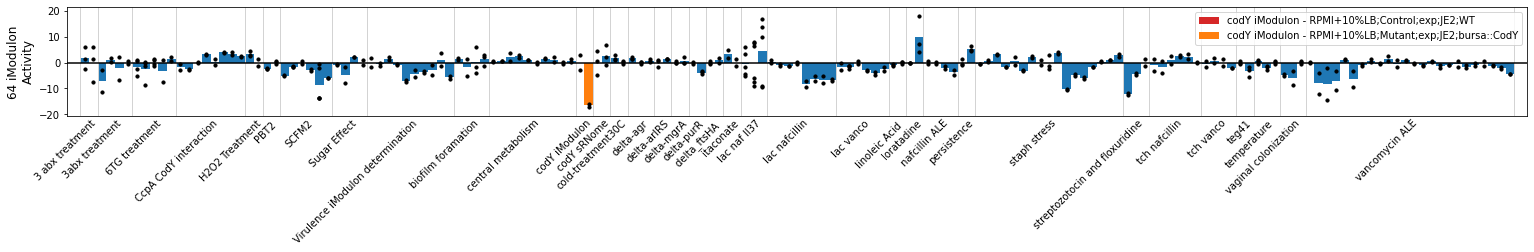

In [1334]:
plot_activities(ica_data,64, highlight=['codY iModulon'])

In [1335]:
DF_enrichments[DF_enrichments.imodulon=='64'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
124,64,map03010,0.000027,0.005383,0.263158,0.086207,0.12987,5.0,58.0,19.0,Ribosome,KEGG pathways,NaN
95,64,M00178,0.000027,0.006898,0.263158,0.086207,0.12987,5.0,58.0,19.0,NaN,KEGG modules,NaN


In [1336]:
# Update ICA data object
ica_data.rename_imodulons({64:'Uncharacterized-6'})

### iModulon 70: Ascorbate Transport

In [1337]:
ica_data.view_imodulon(70)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS01750,0.234265,USA300HOU_RS01750,NC_010079.1,USA300HOU_0350,382560,383906,-,PTS ascorbate transporter subunit IIC,Function unknown,A0A0D6GE08,Op221,NaN
USA300HOU_RS01755,0.236614,USA300HOU_RS01755,NC_010079.1,USA300HOU_0351,383921,384205,-,PTS sugar transporter subunit IIB,Carbohydrate transport and metabolism,A0A0H2X1F4,Op221,NaN
USA300HOU_RS01760,0.283481,USA300HOU_RS01760,NC_010079.1,USA300HOU_0352,384207,384650,-,PTS sugar transporter subunit IIA,Carbohydrate transport and metabolism,A0A0E0VLQ8,Op221,NaN
USA300HOU_RS01765,0.253013,USA300HOU_RS01765,NC_010079.1,USA300HOU_0353,384655,386610,-,BglG family transcription antiterminator,Carbohydrate transport and metabolism,A0A0D6GD02,Op221,NaN


<AxesSubplot:ylabel='70 iModulon\nActivity'>

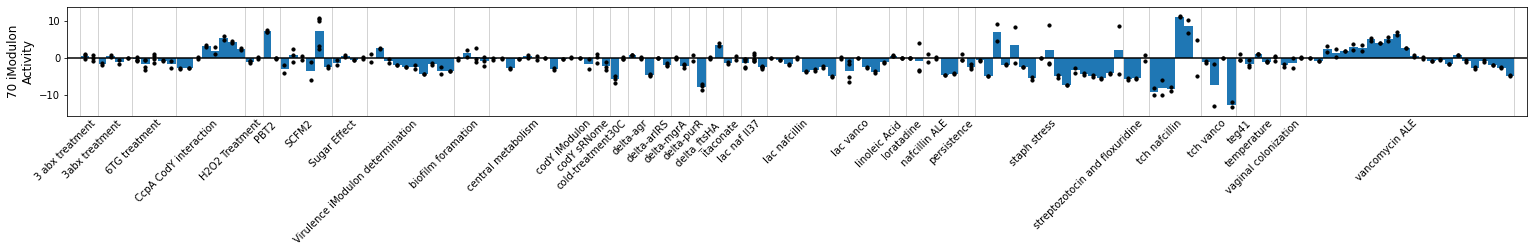

In [1338]:
plot_activities(ica_data,70)

In [1339]:
DF_enrichments[DF_enrichments.imodulon=='70'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name
104,70,M00283,1.029154e-09,1.312172e-07,0.75,1.000000,0.857143,3.0,3.0,4.0,NaN,KEGG modules,NaN
105,70,M00550,1.029154e-09,1.312172e-07,0.75,1.000000,0.857143,3.0,3.0,4.0,NaN,KEGG modules,"Ascorbate degradation, ascorbate => D-xylulose-5P"
134,70,map00053,2.056687e-08,4.092807e-06,0.75,0.500000,0.600000,3.0,6.0,4.0,Ascorbate and aldarate metabolism,KEGG pathways,NaN
135,70,map02060,1.813057e-06,1.803991e-04,0.75,0.130435,0.222222,3.0,23.0,4.0,Phosphotransferase system (PTS),KEGG pathways,NaN
136,70,map01120,5.786045e-04,3.838077e-02,0.75,0.019608,0.038217,3.0,153.0,4.0,Microbial metabolism in diverse environments,KEGG pathways,NaN


In [1340]:
# Update ICA data object
ica_data.rename_imodulons({70:'Ascorbate transport'})
ica_data.imodulon_table.loc['Ascorbate transport','category'] = 'regulatory'

### iModulon 72: Uncharacterized

In [1341]:
ica_data.view_imodulon(72)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS00180,0.055450,USA300HOU_RS00180,NC_010079.1,USA300HOU_0035,44101,44607,-,DUF1643 domain-containing protein,Defense mechanisms,A0A0H2XIB4,Op22,NaN
USA300HOU_RS00230,0.080194,cstB,NC_010079.1,NaN,54926,56244,-,persulfide dioxygenase-sulfurtransferase CstB,Inorganic ion transport and metabolism,NaN,Op28,Genomic Island 1
USA300HOU_RS00325,0.056150,arcA,NC_010079.1,USA300HOU_0070,73059,74294,-,arginine deiminase,Amino acid transport and metabolism,A0A0H2XGY3,Op48,Genomic Island 1
USA300HOU_RS00400,0.162689,USA300HOU_RS00400,NC_010079.1,NaN,89055,89189,-,hypothetical protein,No COG annotation,A0A133QBS3,Op57,NaN
USA300HOU_RS00460,-0.052043,USA300HOU_RS00460,NC_010079.1,USA300HOU_0097,98658,98861,+,hypothetical protein,No COG annotation,A0A0G2LNV1,Op66,NaN
USA300HOU_RS15010,0.318627,USA300HOU_RS15010,NC_010079.1,NaN,360320,360460,-,hypothetical protein,No COG annotation,A0A0U1MWD5,Op205,NaN
USA300HOU_RS15055,0.058054,USA300HOU_RS15055,NC_010079.1,USA300HOU_0460,482432,482848,-,hypothetical protein,No COG annotation,A0A0E1VN96,Op295,NaN
USA300HOU_RS03340,0.051185,USA300HOU_RS03340,NC_010079.1,USA300HOU_0635,691882,692973,-,replication initiation factor,"Replication, recombination and repair",A0A0H2XJ61,Op421,NaN
USA300HOU_RS03925,0.088025,USA300HOU_RS03925,NC_010079.1,USA300HOU_0750,803391,803492,+,hypothetical protein,No COG annotation,A0A2C9TMT1,Op497,NaN
USA300HOU_RS04510,0.166392,USA300HOU_RS04510,NC_010079.1,USA300HOU_0869,910538,911389,-,DUF368 domain-containing protein,Function unknown,A0A0D3Q5R6,Op573,NaN


<AxesSubplot:xlabel='Gene Start', ylabel='72 Gene Weight'>

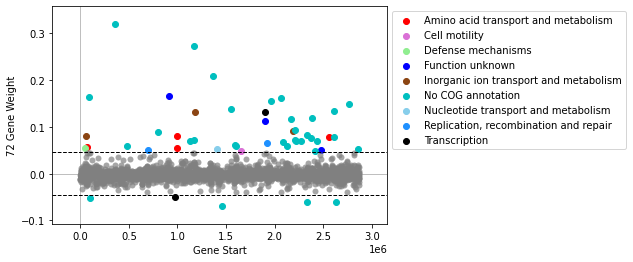

In [1342]:
plot_gene_weights(ica_data, 72)

<AxesSubplot:ylabel='72 iModulon\nActivity'>

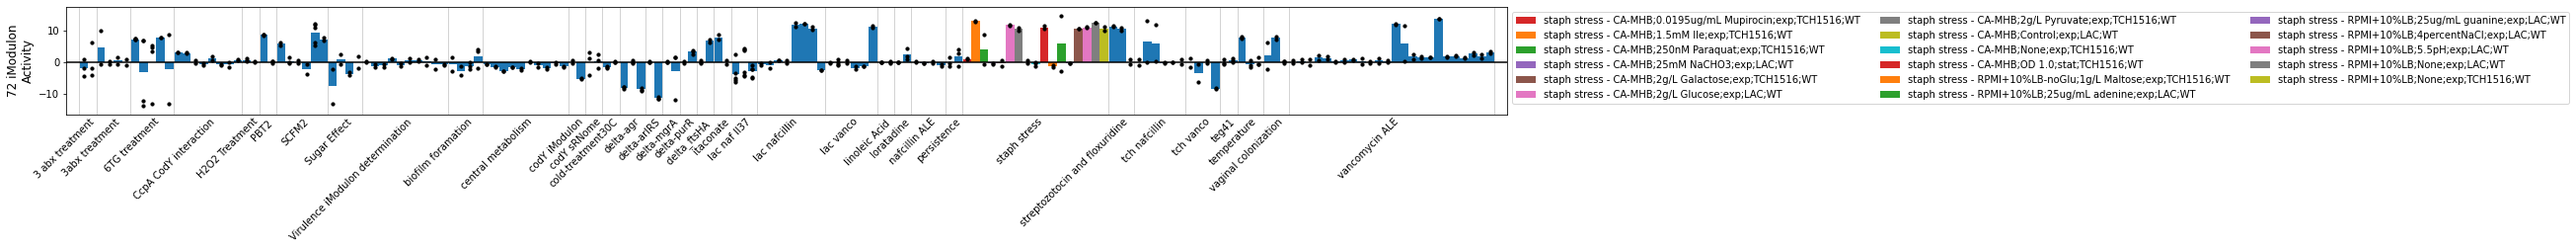

In [1343]:
plot_activities(ica_data,72, highlight=['staph stress'])

In [1344]:
ica_data.rename_imodulons({72:'Uncharacterized-8'})

### iModulon 75: Uncharacterized

In [1345]:
ica_data.view_imodulon(75)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
USA300HOU_RS15675,0.072928,USA300HOU_RS15675,NC_010079.1,NaN,61683,61763,-,hypothetical protein,No COG annotation,UPI000A327884,Op38,NaN
USA300HOU_RS14940,0.160817,USA300HOU_RS14940,NC_010079.1,USA300HOU_0073,76019,76171,-,hypothetical protein,Inorganic ion transport and metabolism,A0A3A0RYE3,Op51,NaN
USA300HOU_RS05375,0.087237,USA300HOU_RS05375,NC_010079.1,NaN,1088266,1088400,-,hypothetical protein,No COG annotation,A0A0E0VN11,Op679,WalR
USA300HOU_RS07670,0.132328,USA300HOU_RS07670,NC_010079.1,NaN,1564672,1564836,-,XkdX family protein,No COG annotation,A0A084P0X8,Op952,"Genomic Island 5,Genomic Island 6"
USA300HOU_RS07915,0.074981,USA300HOU_RS07915,NC_010079.1,USA300HOU_1482,1600918,1601133,-,hypothetical protein,No COG annotation,A0A0E8HEL9,Op964,Genomic Island 6
USA300HOU_RS08400,0.072396,USA300HOU_RS08400,NC_010079.1,USA300HOU_1576,1685208,1685384,-,30S ribosomal protein S21,"Translation, ribosomal structure and biogenesis",A0A077UHS1,Op1019,NaN
USA300HOU_RS08920,0.086909,USA300HOU_RS08920,NC_010079.1,USA300HOU_1670,1785278,1785400,-,hypothetical protein,No COG annotation,A0A0H2X223,Op1070,NaN
USA300HOU_RS15780,0.380949,pepA1,NC_010079.1,NaN,1929867,1929962,+,type I toxin-antitoxin system Fst family toxin...,No COG annotation,UPI0001D0CA73,Op1167,NaN
USA300HOU_RS10580,0.357238,USA300HOU_RS10580,NC_010079.1,NaN,2090818,2090925,+,hypothetical protein,No COG annotation,A0A2C9TI77,Op1277,Genomic Island 9
USA300HOU_RS15450,0.144568,USA300HOU_RS15450,NC_010079.1,USA300HOU_1953,2090978,2091154,-,putative holin-like toxin,No COG annotation,A0A2K4AK90,Op1278,NaN


In [1346]:
DF_enrichments[DF_enrichments.imodulon=='75'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name,source,module_name


In [1347]:
# Update ICA data object
ica_data.rename_imodulons({75:'Uncharacterized-7'})

# Double-check low-scoring iModulons

In [1348]:
ica_data.imodulon_table[ica_data.imodulon_table.f1score < 0.25]

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category
WalR-1,WalR,1.977615e-13,3.955230e-13,0.800000,0.076433,0.139535,12.0,157.0,15,1.0,NaN,0.007553,regulatory
VraS2-1,VraS2,9.312770e-09,2.793831e-08,0.500000,0.133333,0.210526,6.0,45.0,12,1.0,NaN,0.008713,regulatory
CcpA-2,CcpA,2.460824e-06,2.460824e-06,0.714286,0.041322,0.078125,5.0,121.0,7,1.0,NaN,0.003274,regulatory
Rex-1,Rex,1.656345e-07,8.281726e-07,0.179487,0.212121,0.194444,7.0,33.0,39,1.0,NaN,0.011454,regulatory
CodY-2,CodY,1.987481e-12,1.987481e-12,1.000000,0.061224,0.115385,9.0,147.0,9,1.0,NaN,0.012266,regulatory
CodY-3,CodY,4.597413e-15,4.597413e-15,0.736842,0.095238,0.168675,14.0,147.0,19,1.0,NaN,0.006769,regulatory
WalR-3,WalR,2.557458e-17,2.813204e-16,0.385714,0.171975,0.237885,27.0,157.0,70,1.0,NaN,0.021454,regulatory
CcpA-3,CcpA,4.631188e-17,3.704950e-16,0.714286,0.123967,0.211268,15.0,121.0,21,1.0,NaN,0.007904,regulatory
WalR-4,WalR,1.012067e-10,8.096536e-10,0.390244,0.101911,0.161616,16.0,157.0,41,1.0,NaN,0.021817,regulatory
CcpA-4,CcpA,5.104426e-09,5.104426e-09,1.000000,0.049587,0.094488,6.0,121.0,6,1.0,NaN,0.005583,regulatory


In [1349]:
def clear_row(imodulon):
    clear_columns = ['regulator','pvalue','qvalue','precision','recall','f1score','TP','regulon_size','n_regs']
    
    for col in clear_columns:
        ica_data.imodulon_table.loc[imodulon,col] = None

#### WalR-1 -> Autolysin
Contains many of the virulence genes in the SaeR reuglon

In [1350]:
# Update the ICA data object
ica_data.rename_imodulons({'WalR-1':'Autolysin'})

#### CcpA-2 -> FadR

In [1351]:
ica_data.rename_imodulons({'CcpA-2':'FadR'})

#### CodY-2 -> ILVopr

In [1352]:
ica_data.rename_imodulons({'CodY-2':'ILVopr'})

#### CodY-3 -> Capsule Biosynthesis

In [1353]:
ica_data.rename_imodulons({'CodY-3': 'Capsule Biosynthesis'})

#### WalR-3 -> SigB
Lowest activity in sigB::bursa

<AxesSubplot:ylabel='WalR-3 iModulon\nActivity'>

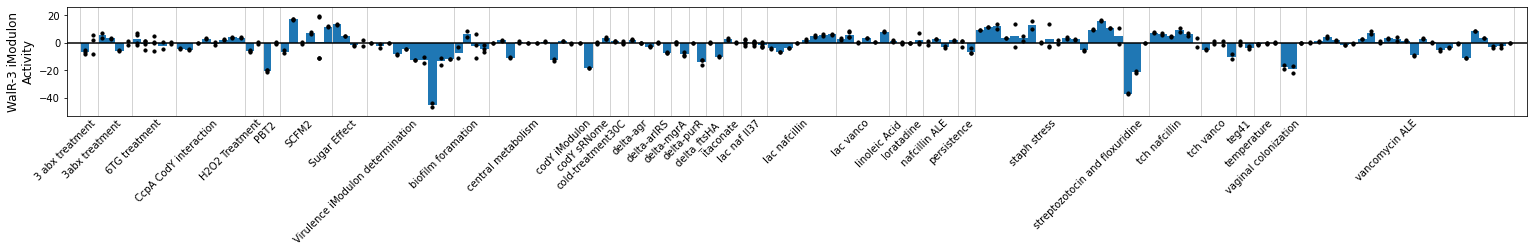

In [1354]:
plot_activities(ica_data, 'WalR-3')

In [1355]:
ica_data.rename_imodulons({'WalR-3': 'SigB'})

#### CcpA-4 -> Oxoproline Metabolism
all in same operon with 5-oxoproline metabolism genes

In [1356]:
ica_data.rename_imodulons({'CcpA-4': 'Oxoproline metabolism'})

#### Genomic Island-9 -> Phi-Sa3

In [1357]:
ica_data.rename_imodulons({'Genomic Island 9-1': 'Phi-Sa3',
 'Genomic Island 9-2': 'Phi-Sa3',
 'Genomic Island 9-3': 'Phi-Sa3',})

#### Genomic Island 1 -> SccMEC/ACME

In [1358]:
ica_data.rename_imodulons({'Genomic Island 1': 'SCCMec/ACME'})

#### Genomic Island 8/ SaeR -> SaeR-2

In [1359]:
ica_data.rename_imodulons({'SaeR/Genomic Island 8': 'SaeR-2'})

### Label iModulon based on KO

#### WalR-4 -> SigS

In [1360]:
ica_data.rename_imodulons({'WalR-4': 'SigS'})

In [1361]:
ica_data.rename_imodulons({'WalR-2': 'SaeR-1',
                          'Translation': 'Translation-1',
                          'L20_leader': 'Translation-2'})

#### Clear the iModulon stats for these

In [1362]:
for imod in ['Autolysin', 'FadR', 'ILVopr', 'Capsule Biosynthesis', 'SigB', 'Oxoproline metabolism', 'SigS',
            'SaeR-1']:
    clear_row(imod)

### Clean up iModulon numbers

In [1363]:
ica_data.rename_imodulons({'CcpA-3': 'CcpA-2',
                          'CodY-4': 'CodY-2'})

## Manually curate functions

In [1364]:
func_cats = ['Other', #0
             'Carbon Metabolism', #1 
             'Stress Response', #2
             'AA/Nucleotide Metabolism', #3
             'Misc. Metabolism', #4
             'Cellular Processes', #5
             'Virulence', #6
             'Uncharacterized', #7
             'Single gene', #8
            'Prophages']#9

In [1405]:
#assign category for each iModulon based on func_cats
cat_nums = [6, 1, 2, 5, 2, 9, 3, 5, 7, 3,
           3, 2, 4, 1, 2, 1, 2, 4, 8, 8,
           4, 1, 4, 3, 3, 7, 8, 7, 9, 3,
           7, 3, 3, 6, 7,6,  8, 3, 0, 6,
           9, 6, 8, 9, 5, 0, 4, 7, 2, 6,
           4, 7, 1, 3, 6, 4, 6, 6, 1, 4,
           6, 8, 5, 2, 7, 1, 4, 3, 2, 4,
           4, 8, 7, 3, 8, 7]


In [1406]:
func_map = dict(zip((ica_data.imodulon_names), [func_cats[i] for i in cat_nums]))

In [1407]:
ica_data.imodulon_table['function'] = ica_data.imodulon_table.index.map(func_map)

In [1408]:
ica_data.imodulon_table.function.value_counts()

AA/Nucleotide Metabolism    12
Misc. Metabolism            11
Uncharacterized             10
Virulence                   10
Stress Response              8
Single gene                  8
Carbon Metabolism            7
Prophages                    4
Cellular Processes           4
Other                        2
Name: function, dtype: int64

In [1409]:
ica_data.imodulon_table[ica_data.imodulon_table.function == 'Carbon Metabolism']

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category,function
FruR,FruR,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,3.0,3.0,3,1.0,,0.003074,regulatory,Carbon Metabolism
CcpA-1,CcpA,1.213330e-81,2.426660e-80,0.654545,0.595041,0.623377,72.0,121.0,110,1.0,,0.061166,regulatory,Carbon Metabolism
CggR,CggR,3.789150e-15,3.789150e-15,1.000000,0.833333,0.909091,5.0,6.0,5,1.0,,0.005717,regulatory,Carbon Metabolism
GlpR,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,,0.003973,regulatory,Carbon Metabolism
ManR,ManR,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,2.0,2.0,2,1.0,,0.005047,regulatory,Carbon Metabolism
LacR,LacR,1.326202e-14,1.326202e-14,0.714286,1.000000,0.833333,5.0,5.0,7,1.0,,0.020340,regulatory,Carbon Metabolism
CcpA-2,CcpA,4.631188e-17,3.704950e-16,0.714286,0.123967,0.211268,15.0,121.0,21,1.0,,0.007904,regulatory,Carbon Metabolism


# Save final ICA data object

In [1548]:
save_to_json(ica_data, path.join(data_dir, 'saureus.json.gz'))

In [1549]:
ica_data.imodulon_table.to_csv(path.join(data_dir, 'imodulon_table.csv'))